# <span style="color: red;"> 🎉 Background and Problem Statement 🎉</span>



**Can we accurately predict the income category of credit card holders based on their demographics and transactional data?**


# Initialisation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # only need pyplot for this example class
import seaborn as sb
sb.set()
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import ALL libraries here
from google.colab import files
from sklearn.model_selection import train_test_split # import the library to do random splitting for the train and test data
from sklearn.tree import DecisionTreeClassifier # import the decision tree library
from sklearn.tree import plot_tree # import the library to plot the decision tree
from sklearn.metrics import confusion_matrix # import confusion matrix library
from sklearn.linear_model import LinearRegression # import the linear regression library
from sklearn.metrics import mean_squared_error # import the mean squared error library
from sklearn.preprocessing import OneHotEncoder # import the encoding library
from sklearn.ensemble import RandomForestClassifier # import the random forest library
from sklearn.metrics import accuracy_score # import the accuracy score library
from sklearn.ensemble import GradientBoostingClassifier # import the gradient boosting library
from sklearn.metrics import classification_report # import the classification report library

from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Data Preparation
## Read the necessary file, select variables we need

In [ ]:
uploaded = files.upload()

Saving credit_2018_2019.xlsx to credit_2018_2019.xlsx


In [ ]:
allcreditData = pd.read_excel("credit_2018_2019.xlsx", sheet_name = "info_all")
display(allcreditData.head())
allcreditData.info()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Ct,Avg_Utilization_Ratio,Quarter,Year,Date_Leave
0,712672083,Existing Customer,65,F,0,High School,Married,Less than $40K,Blue,36,...,3,2,1438.3,747,691.3,24,0.519,none,2018,"none,2018"
1,713049933,Existing Customer,47,F,1,Graduate,Married,$40K - $60K,Silver,36,...,2,2,5756.0,0,5756.0,44,0.000,none,2018,"none,2018"
2,713049933,Existing Customer,48,F,1,Graduate,Married,$40K - $60K,Silver,48,...,6,2,5756.0,990,5756.0,25,0.170,none,2019,"none,2019"
3,713135883,Existing Customer,65,F,0,College,Married,Less than $40K,Blue,65,...,5,0,4315.0,393,3598.0,73,0.090,none,2019,"none,2019"
4,713135883,Existing Customer,64,F,0,College,Married,Less than $40K,Blue,53,...,3,0,4315.0,717,3598.0,51,0.166,none,2018,"none,2018"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20071 entries, 0 to 20070
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 20071 non-null  int64  
 1   Attrition_Flag            20071 non-null  object 
 2   Customer_Age              20071 non-null  int64  
 3   Gender                    20071 non-null  object 
 4   Dependent_count           20071 non-null  int64  
 5   Education_Level           20071 non-null  object 
 6   Marital_Status            20071 non-null  object 
 7   Income_Category           20071 non-null  object 
 8   Card_Category             20071 non-null  object 
 9   Months_on_book            20071 non-null  int64  
 10  Total_Relationship_Count  20071 non-null  int64  
 11  Months_Inactive_12_mon    20071 non-null  int64  
 12  Contacts_Count_12_mon     20071 non-null  int64  
 13  Credit_Limit              20071 non-null  float64
 14  Total_

In [ ]:
# Separate numerical and categorical data into separate dataframe for easy plotting of statistical distributions
creditData_num = allcreditData[["Customer_Age","Dependent_count", "Total_Relationship_Count", "Months_on_book", "Credit_Limit",
                                "Months_Inactive_12_mon","Contacts_Count_12_mon","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Trans_Ct",
                                "Avg_Utilization_Ratio"]]
creditData_cat = allcreditData[["Attrition_Flag", "Gender", "Education_Level", "Marital_Status", "Income_Category","Card_Category"]]

# Verify creditData_num and creditData_cat only contains numerical and categorical data respectively
display(creditData_num.info())
display(creditData_cat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20071 entries, 0 to 20070
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              20071 non-null  int64  
 1   Dependent_count           20071 non-null  int64  
 2   Total_Relationship_Count  20071 non-null  int64  
 3   Months_on_book            20071 non-null  int64  
 4   Credit_Limit              20071 non-null  float64
 5   Months_Inactive_12_mon    20071 non-null  int64  
 6   Contacts_Count_12_mon     20071 non-null  int64  
 7   Total_Revolving_Bal       20071 non-null  int64  
 8   Avg_Open_To_Buy           20071 non-null  float64
 9   Total_Trans_Ct            20071 non-null  int64  
 10  Avg_Utilization_Ratio     20071 non-null  float64
dtypes: float64(3), int64(8)
memory usage: 1.7 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20071 entries, 0 to 20070
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Attrition_Flag   20071 non-null  object
 1   Gender           20071 non-null  object
 2   Education_Level  20071 non-null  object
 3   Marital_Status   20071 non-null  object
 4   Income_Category  20071 non-null  object
 5   Card_Category    20071 non-null  object
dtypes: object(6)
memory usage: 941.0+ KB


None

We decided to drop the following variables: "CLIENTNUM", "Quarter", "Year", and "Date_Leave" from our explaratory analysis because they are considered irrelevant in predicting our reponse variable.

In [ ]:
display(creditData_num.describe(include = "all"))
display(creditData_cat.describe(include = "all"))

,Customer_Age,Dependent_count,Total_Relationship_Count,Months_on_book,Credit_Limit,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Ct,Avg_Utilization_Ratio
count,20071.000000,20071.000000,20071.000000,20071.000000,20071.000000,20071.000000,20071.000000,20071.000000,20071.000000,20071.000000,20071.000000
mean,46.331872,1.954810,3.816701,41.039510,8637.125759,2.665388,2.449106,1011.000399,7480.056754,67.817797,0.244055
std,8.385922,1.201685,1.553507,10.392045,9084.355769,1.612679,1.104183,658.145373,9103.256947,26.786190,0.234877
min,24.000000,0.000000,1.000000,13.000000,1400.000000,0.000000,0.000000,0.000000,3.000000,10.000000,0.000000
25%,41.000000,1.000000,3.000000,35.000000,2548.500000,1.000000,2.000000,521.000000,1312.500000,45.000000,0.050000
50%,47.000000,2.000000,4.000000,41.000000,4532.000000,3.000000,2.000000,1002.000000,3474.000000,69.000000,0.160000
75%,52.000000,3.000000,5.000000,48.000000,11062.000000,3.000000,3.000000,1418.500000,9904.000000,86.000000,0.390000
max,65.000000,5.000000,6.000000,68.000000,35000.000000,6.000000,6.000000,12080.000000,34516.000000,139.000000,0.999000


,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,20071,20071,20071,20071,20071,20071
unique,2,2,6,3,5,4
top,Existing Customer,F,Graduate,Married,$40K - $60K,Blue
freq,17499,10639,8944,12292,7668,9994


# Data Visualisation


## Uni-Variate Visualisation

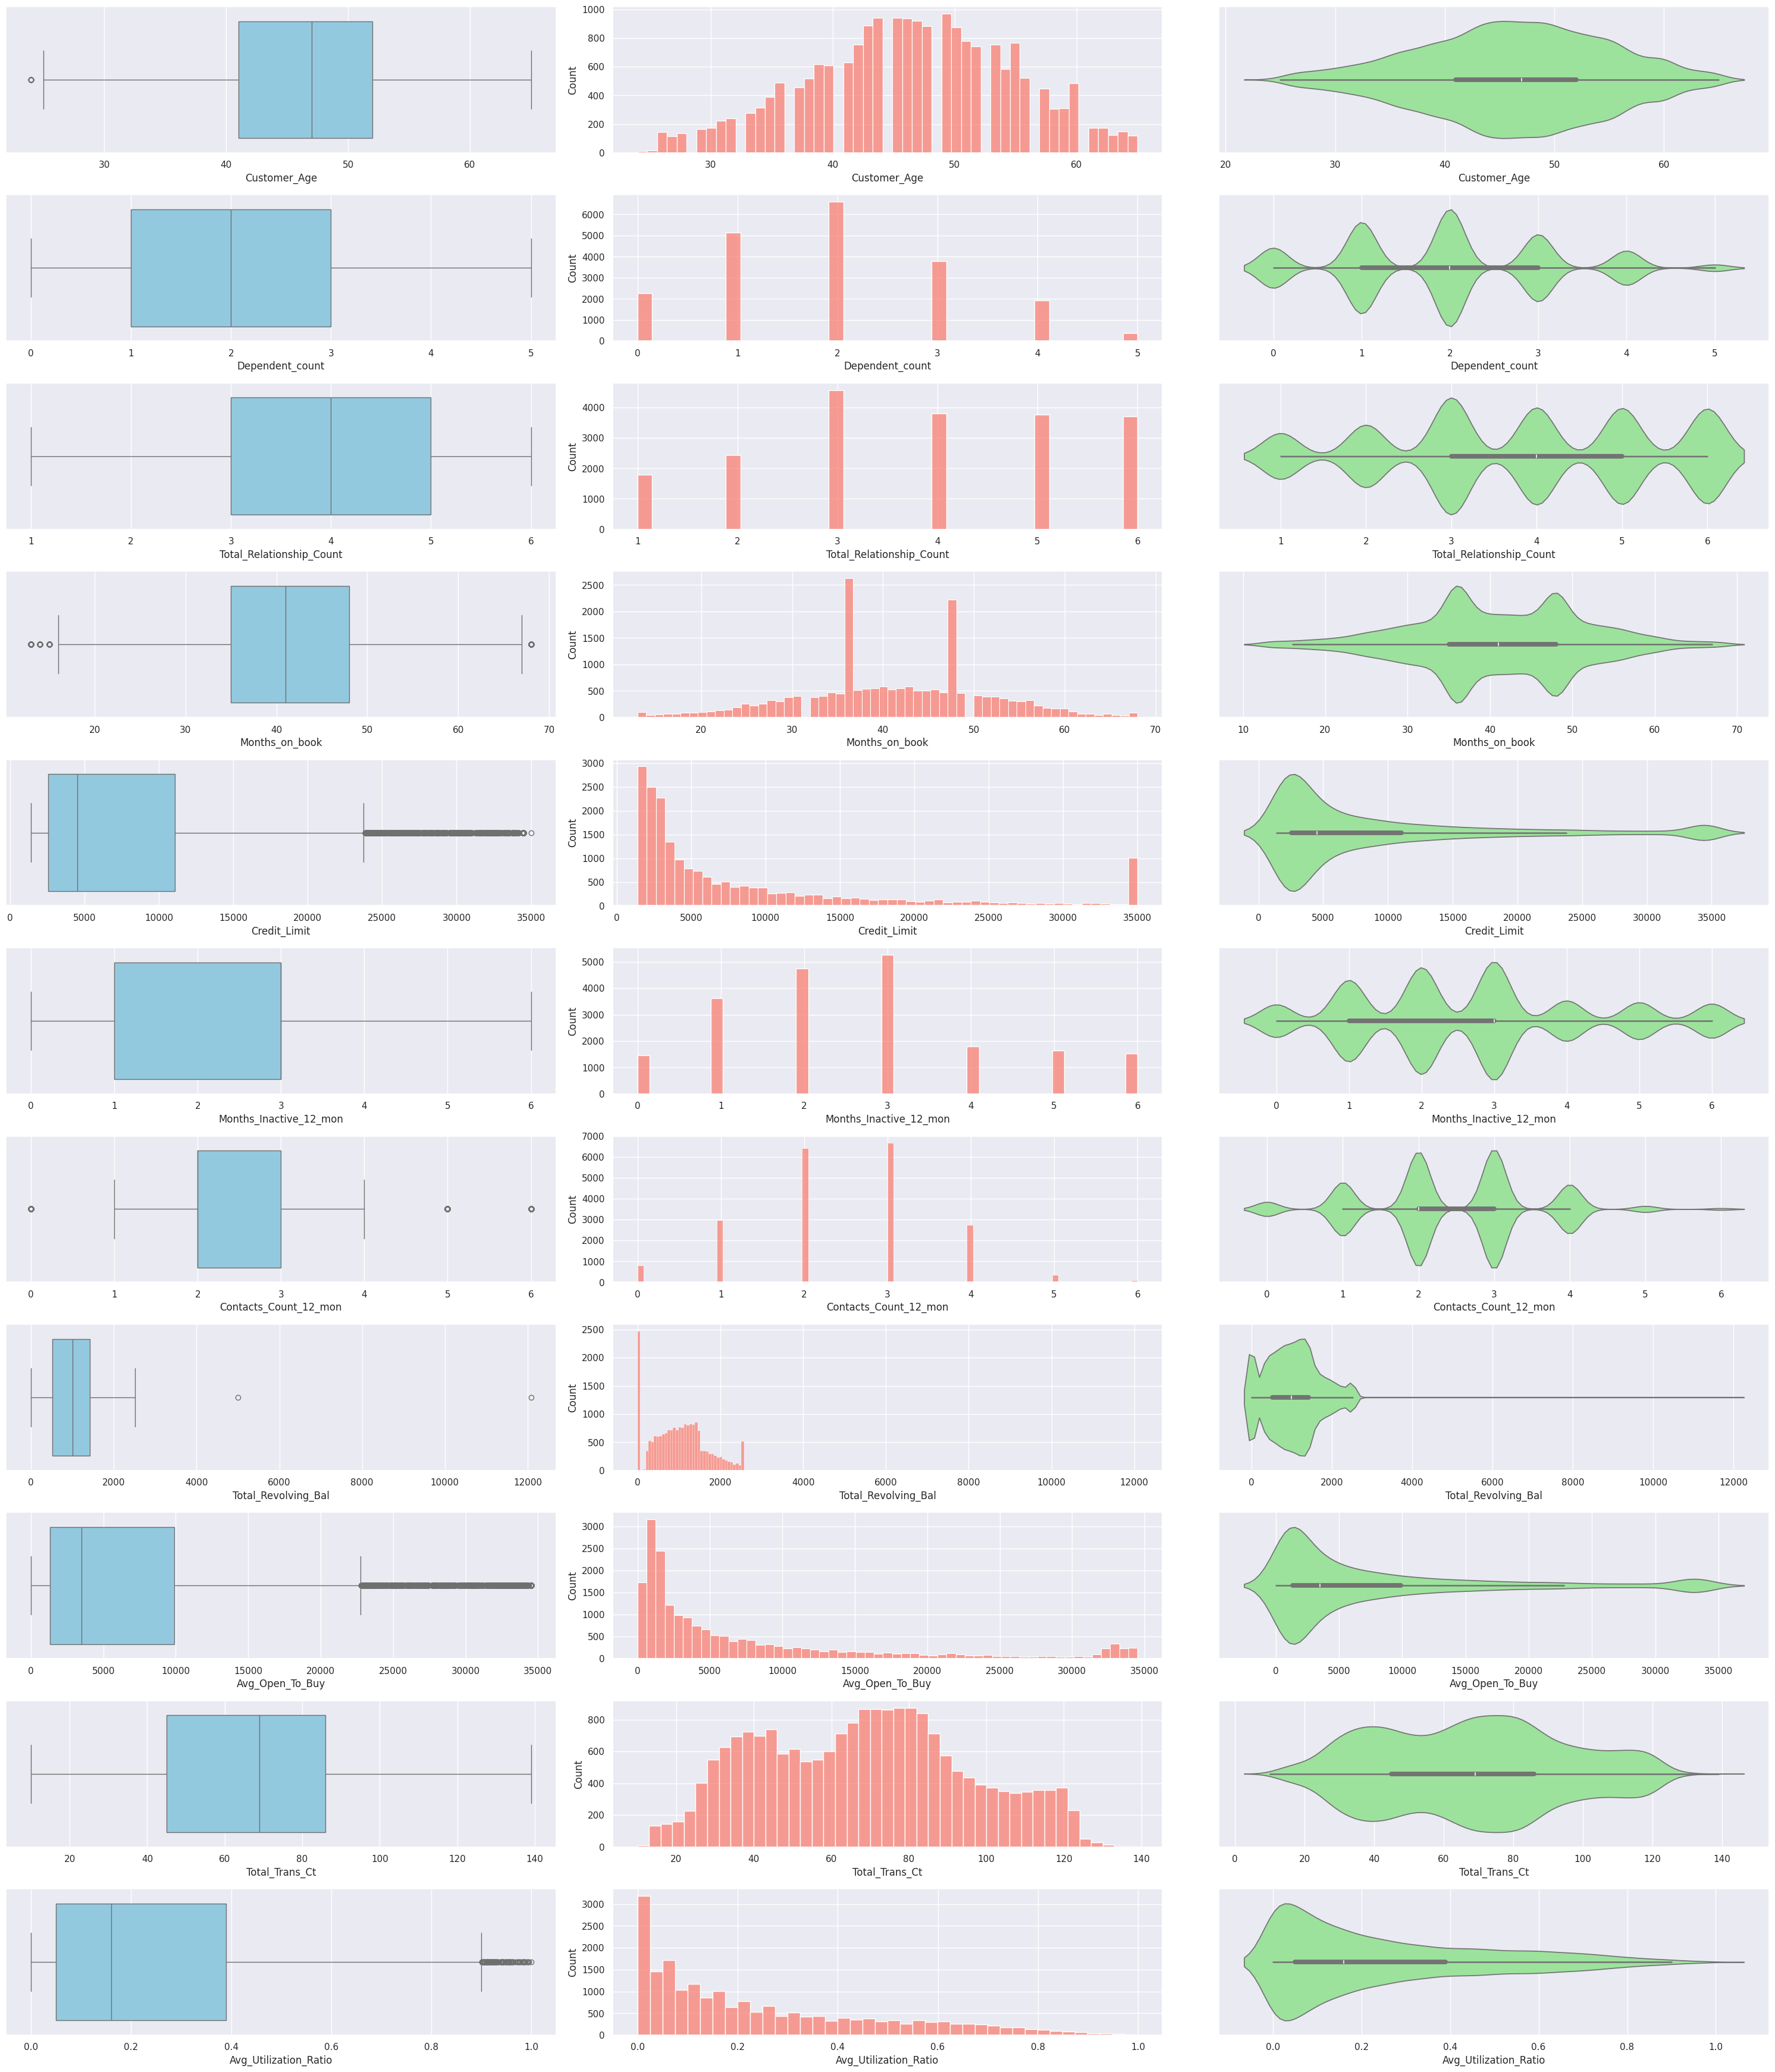

In [ ]:
fig, axes = plt.subplots(11,3, figsize = (30, 35))
count = 0

for var in creditData_num:
    sb.boxplot(data = creditData_num[var], orient = "h", color = "skyblue", ax = axes[count,0])
    sb.histplot(data = creditData_num[var], color = "salmon", ax = axes[count,1])
    sb.violinplot(data = creditData_num[var], orient = "h", color = "lightgreen", ax = axes[count,2])
    count += 1

plt.tight_layout()
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 10

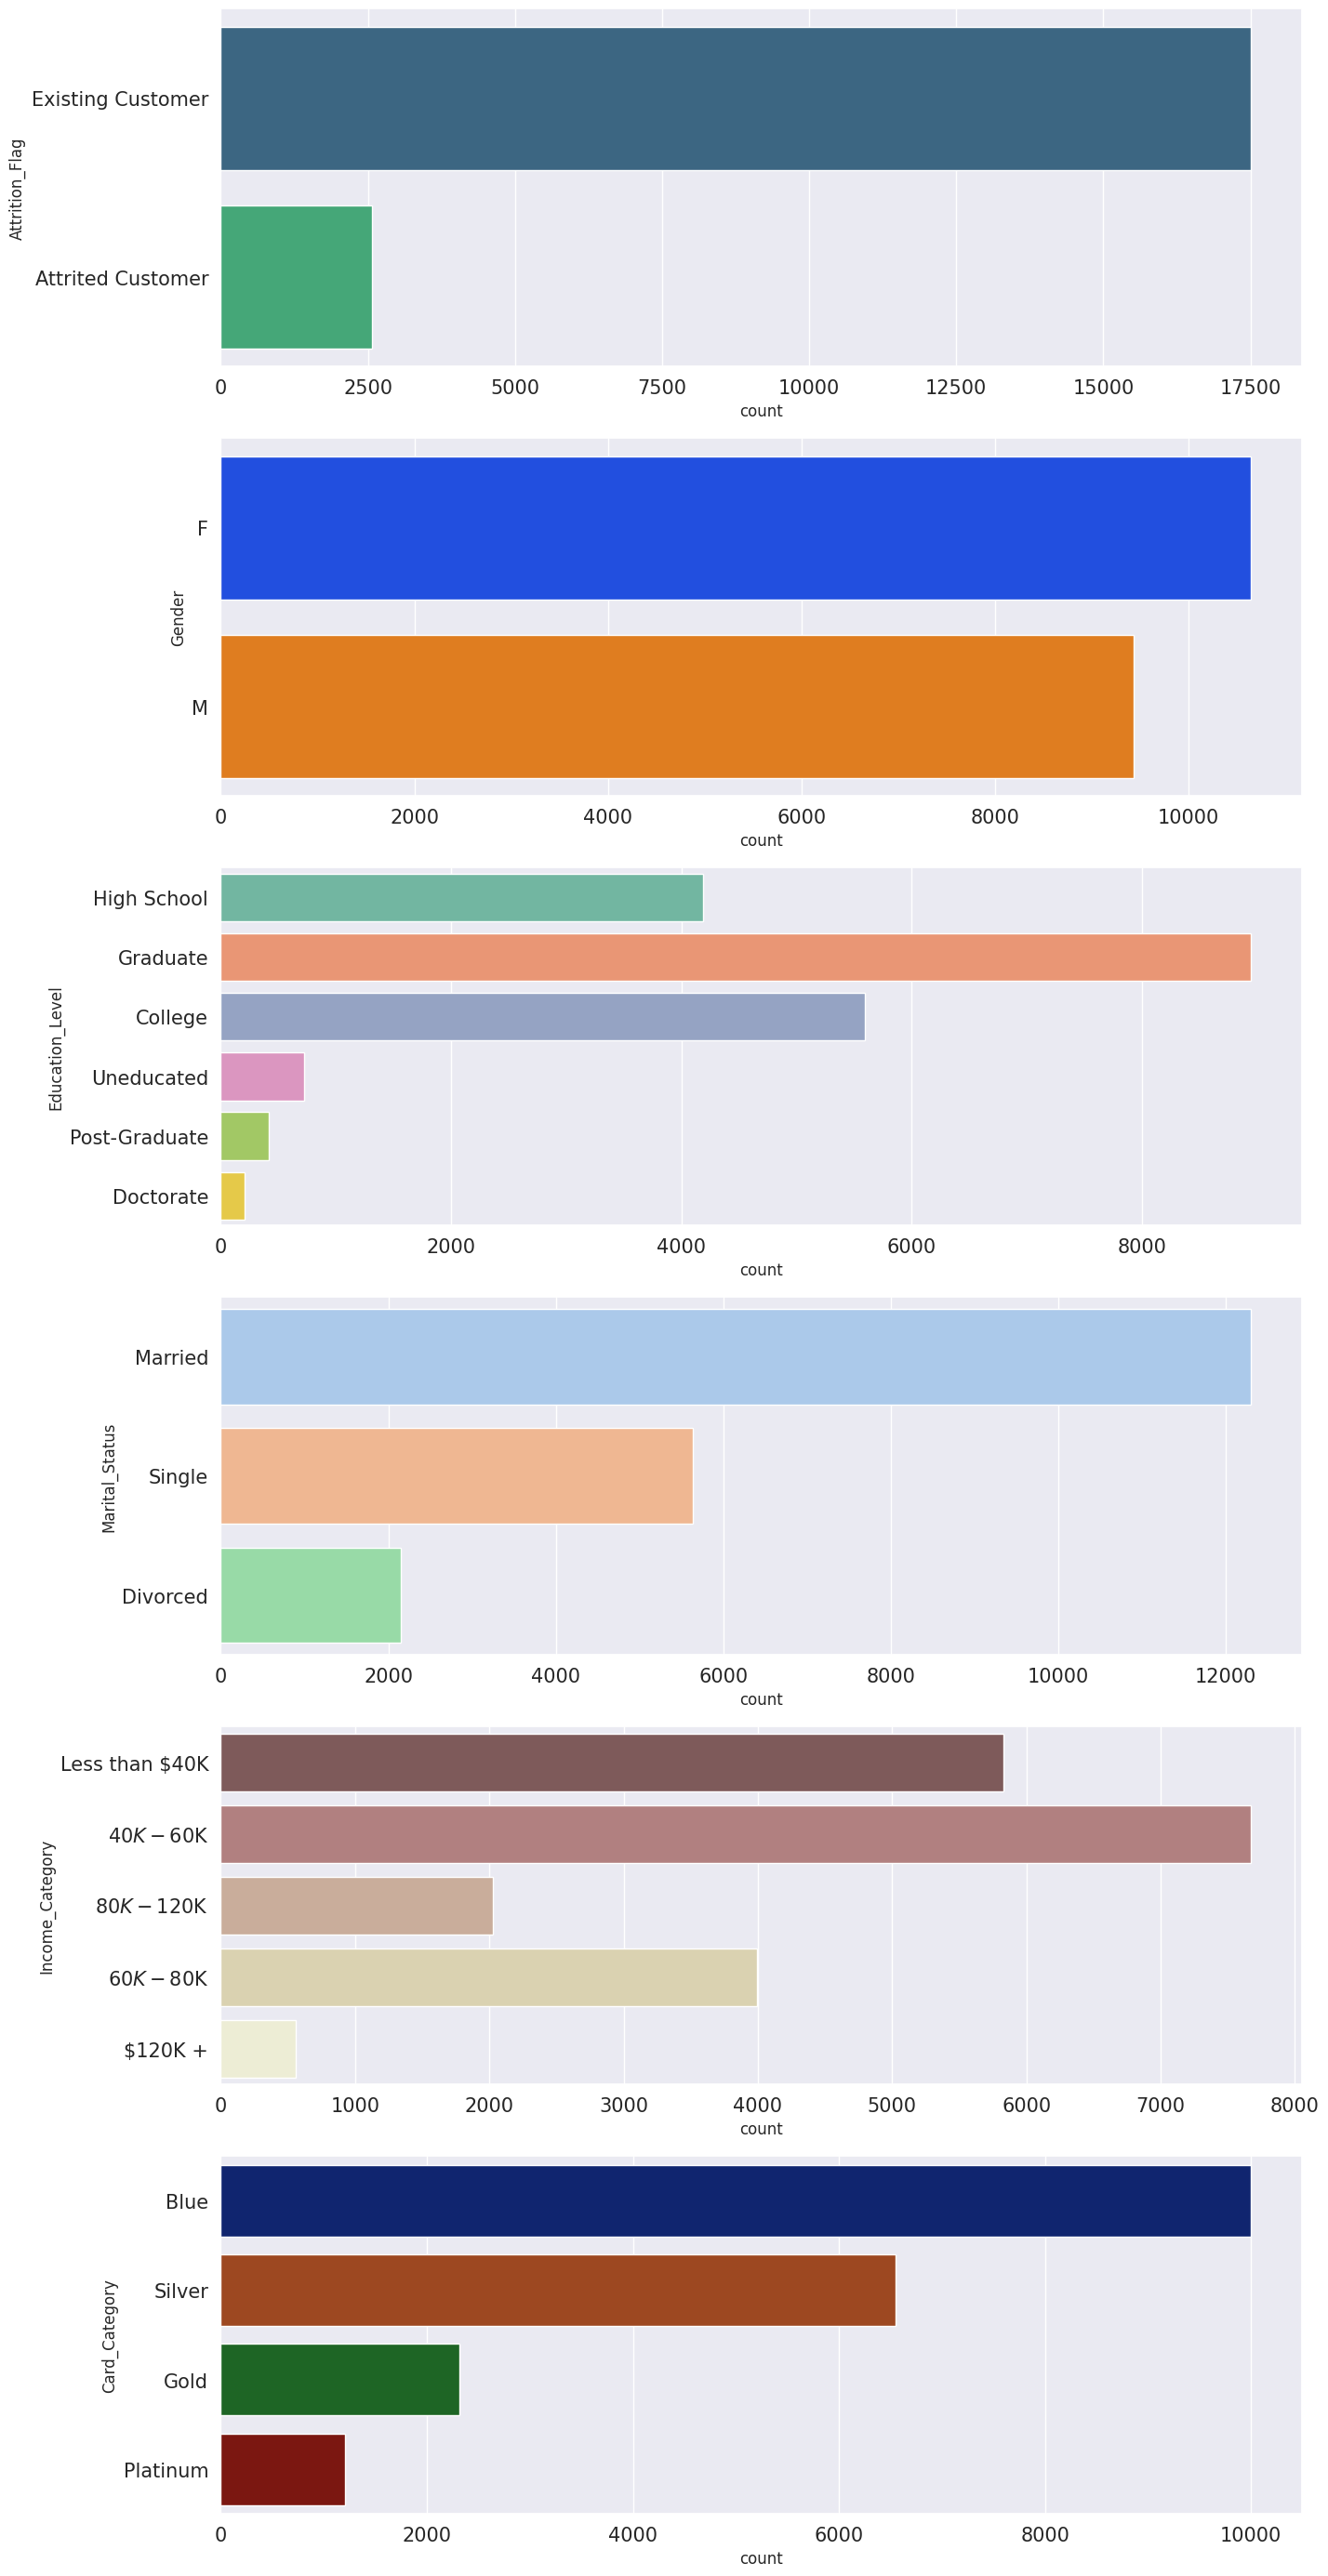

In [ ]:
fig, axes = plt.subplots(6,1, figsize = (15, 35))

sb.countplot(data = creditData_cat, y = "Attrition_Flag", palette = "viridis", ax = axes[0])
sb.countplot(data = creditData_cat, y = "Gender", palette = "bright", ax = axes[1])
sb.countplot(data = creditData_cat, y = "Education_Level", palette = "Set2", ax = axes[2])
sb.countplot(data = creditData_cat, y = "Marital_Status", palette = "pastel", ax = axes[3])
sb.countplot(data = creditData_cat, y = "Income_Category", palette = "pink", ax = axes[4])
sb.countplot(data = creditData_cat, y = "Card_Category", palette = "dark", ax = axes[5])

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

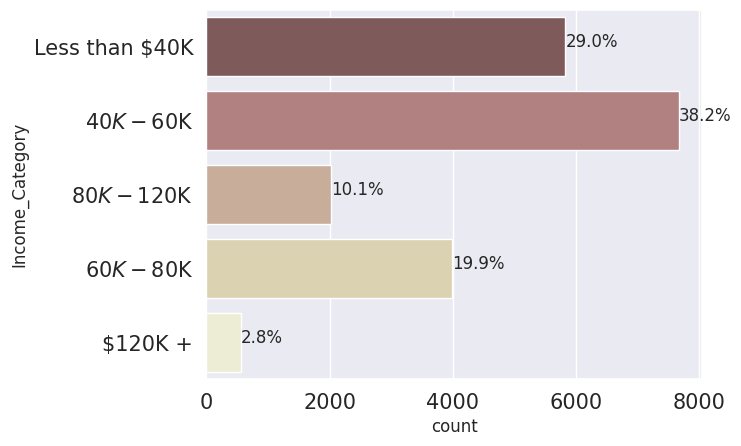

In [ ]:
ax = sb.countplot(data = creditData_cat, y = "Income_Category", palette = "pink")

total = len(creditData_cat["Income_Category"])  # Total number of data points
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_width() / total)  # Calculate percentage
    x = p.get_x() + p.get_width() + 0.02  # Set x position for annotation
    y = p.get_y() + p.get_height() / 2  # Set y position for annotation
    ax.annotate(percentage, (x, y))  # Add the annotation

plt.show()

In [ ]:
total_points = len(creditData_cat["Income_Category"])
print(f"Total number of points in Income_Category: {total_points}")

Total number of points in Income_Category: 20071


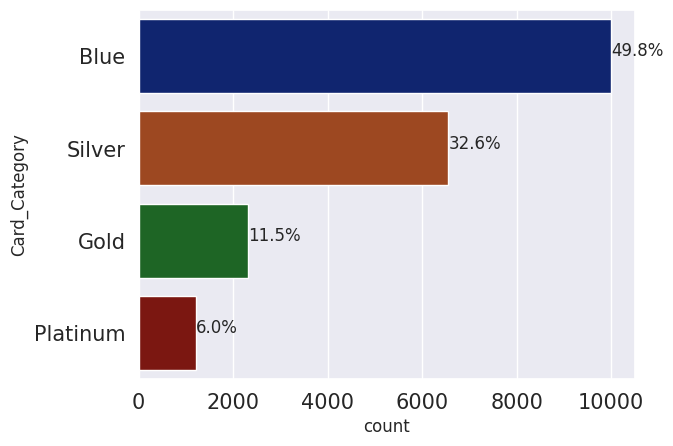

In [ ]:
ax = sb.countplot(data = creditData_cat, y = "Card_Category", palette = "dark")

total = len(creditData_cat["Card_Category"])  # Total number of data points
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_width() / total)  # Calculate percentage
    x = p.get_x() + p.get_width() + 0.02  # Set x position for annotation
    y = p.get_y() + p.get_height() / 2  # Set y position for annotation
    ax.annotate(percentage, (x, y))  # Add the annotation

plt.show()

## Bi-variate Visualisation:

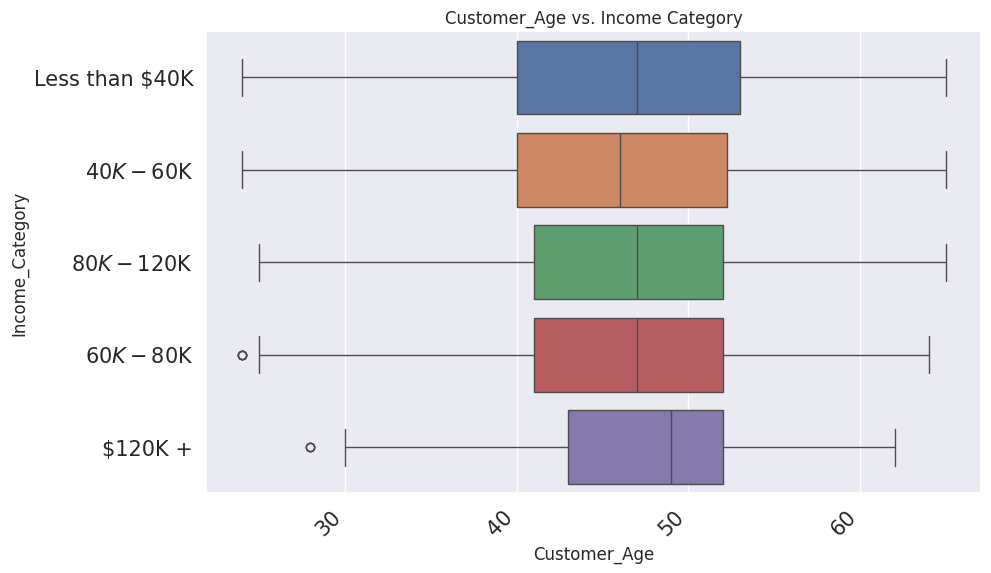

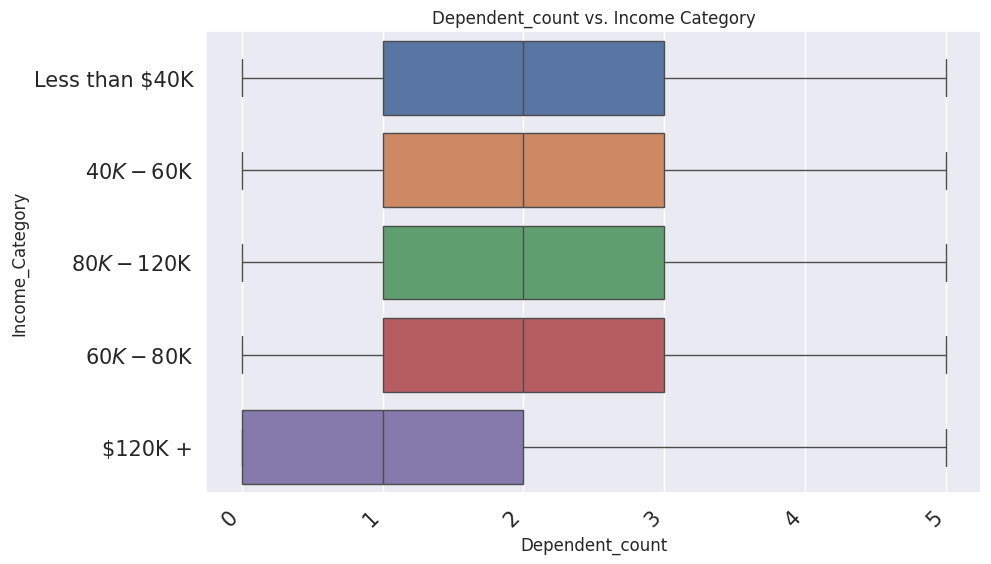

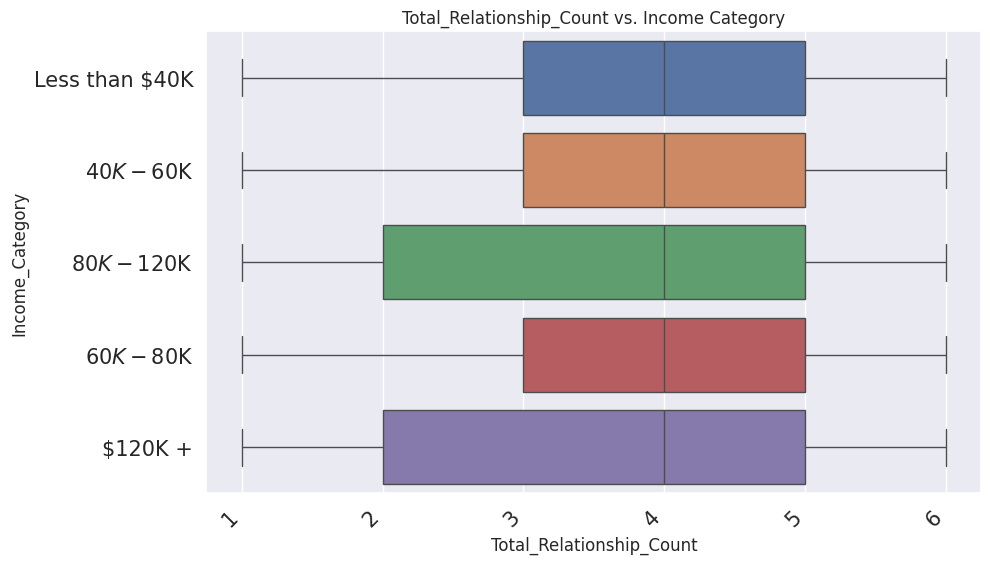

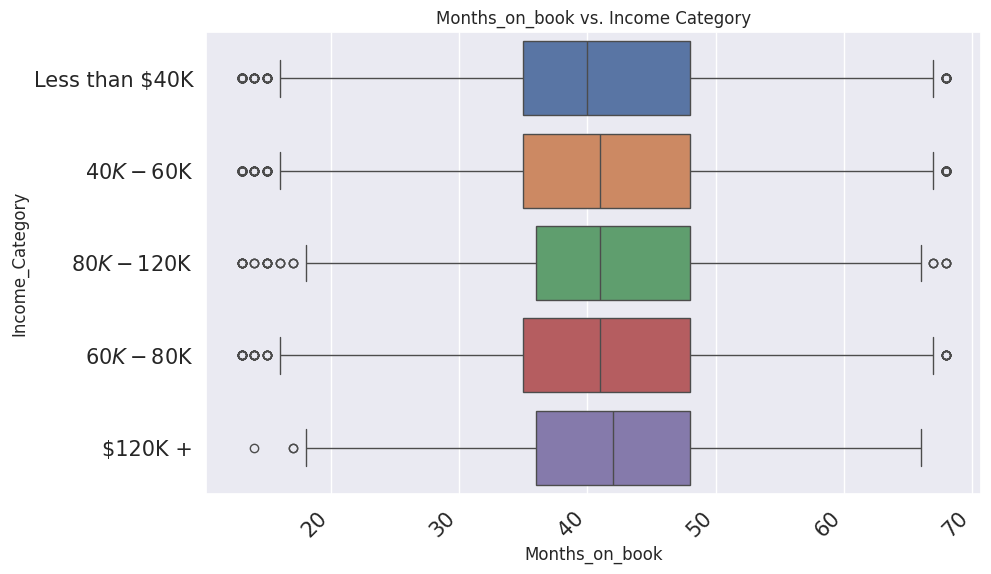

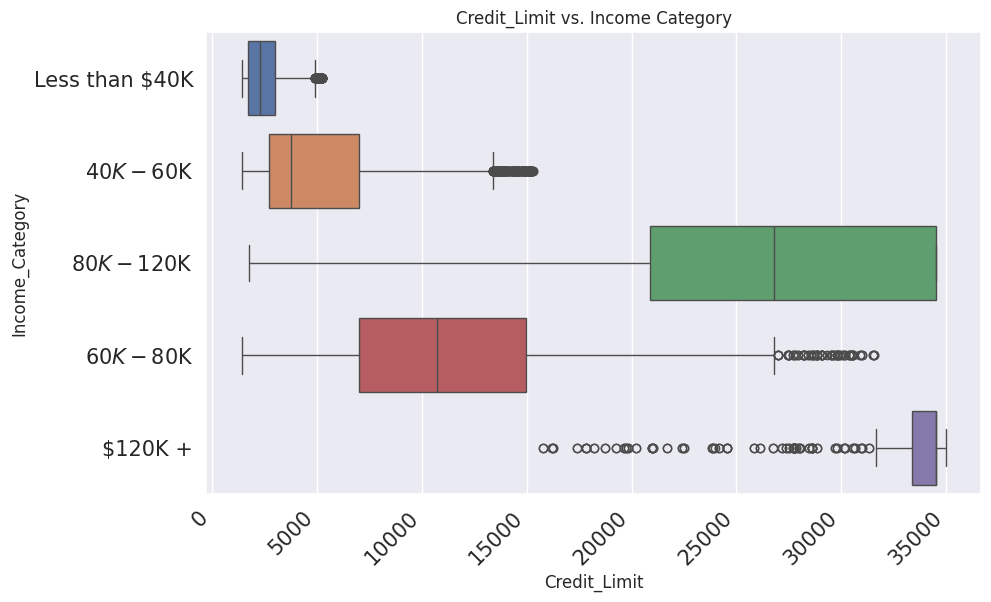

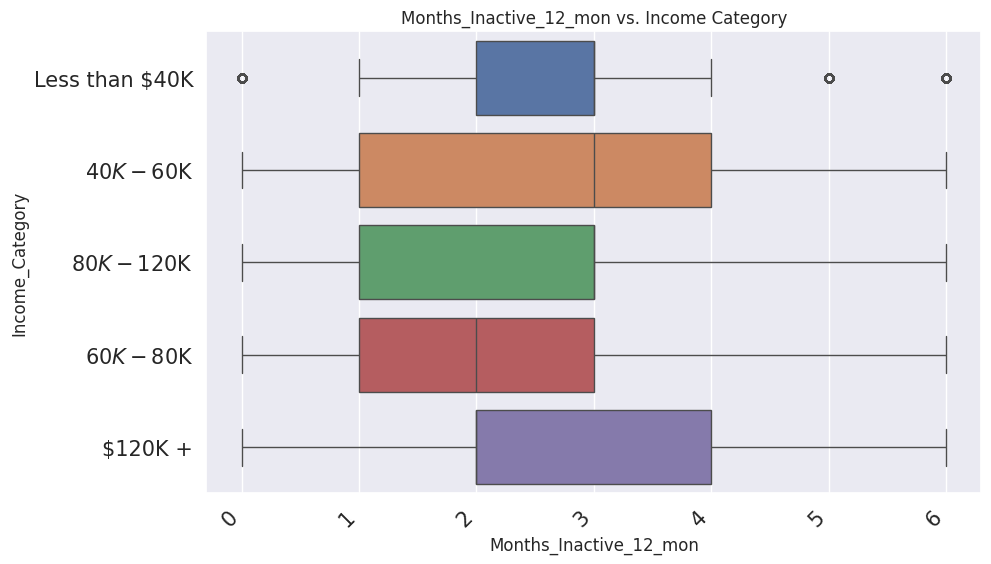

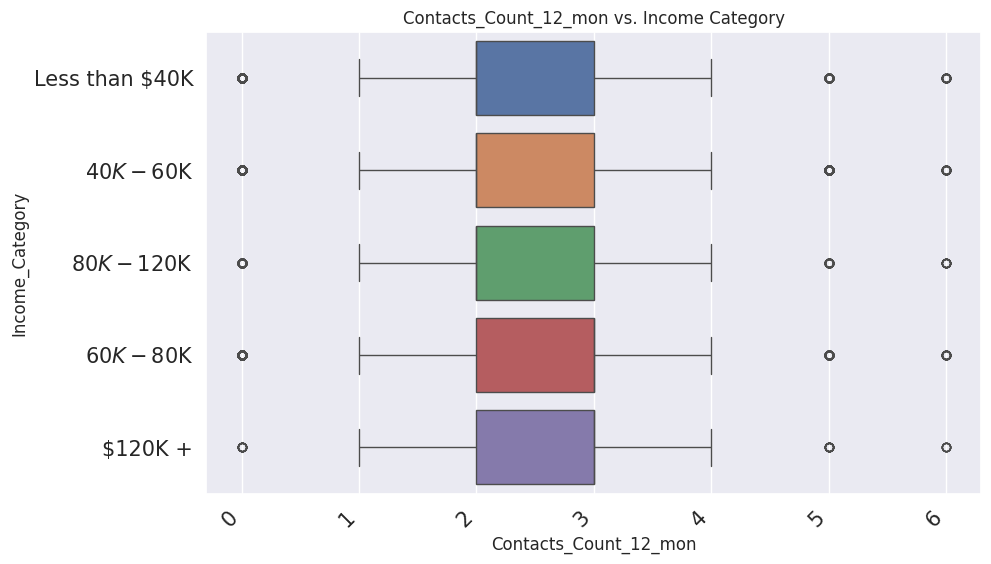

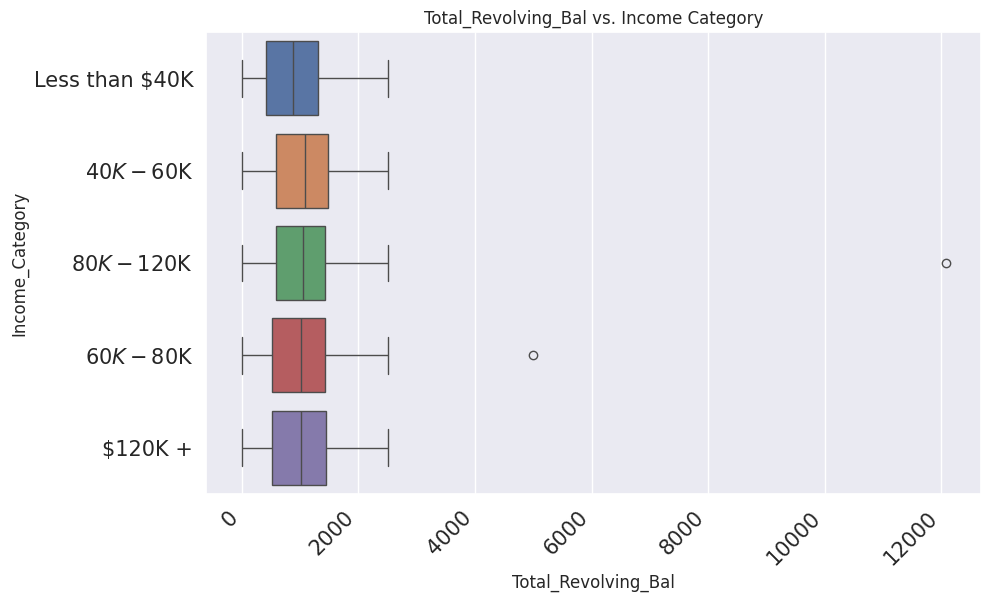

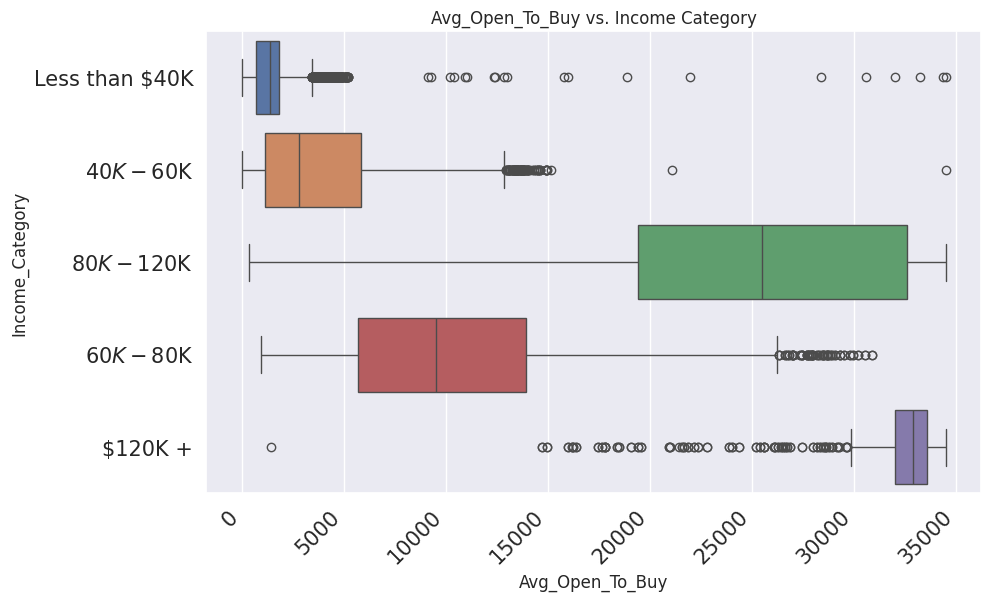

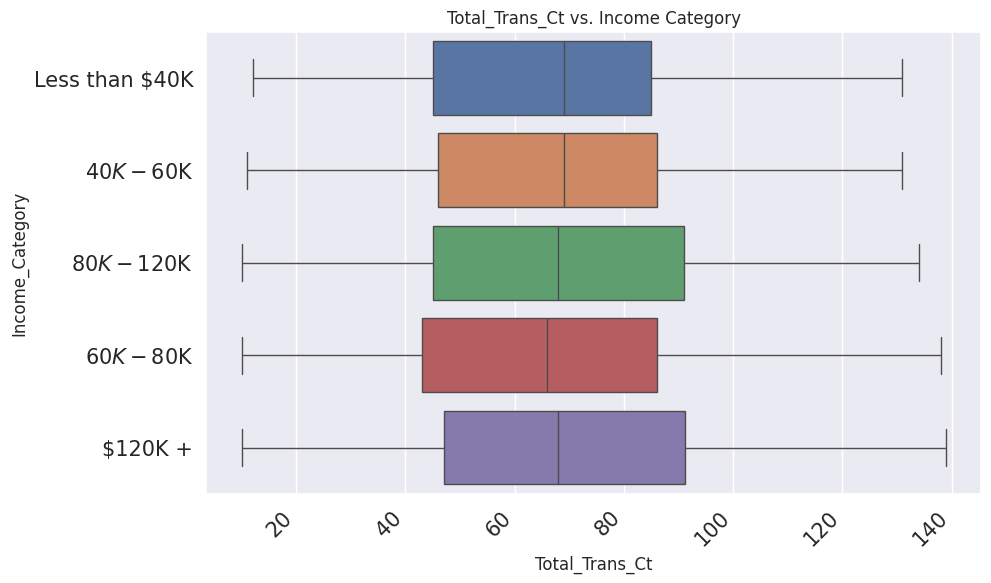

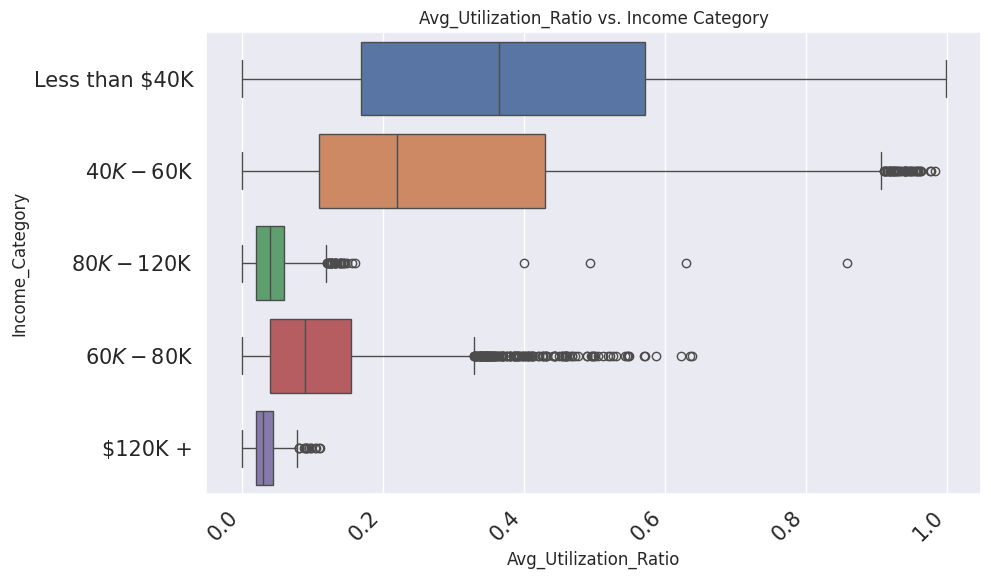

In [ ]:
# Numerical vs Income_Category:
for column in creditData_num:
  plt.figure(figsize=(10, 6))
  sb.boxplot(y = creditData_cat["Income_Category"], x = creditData_num[column], hue = creditData_cat["Income_Category"])
  plt.title(f'{column} vs. Income Category')
  plt.xticks(rotation=45, ha='right')
  plt.show()

From the mutual boxplots, potential predictors are: "Credit_Limit", "Avg_Open_To_Buy", and "Avg_Utilization_Ratio".

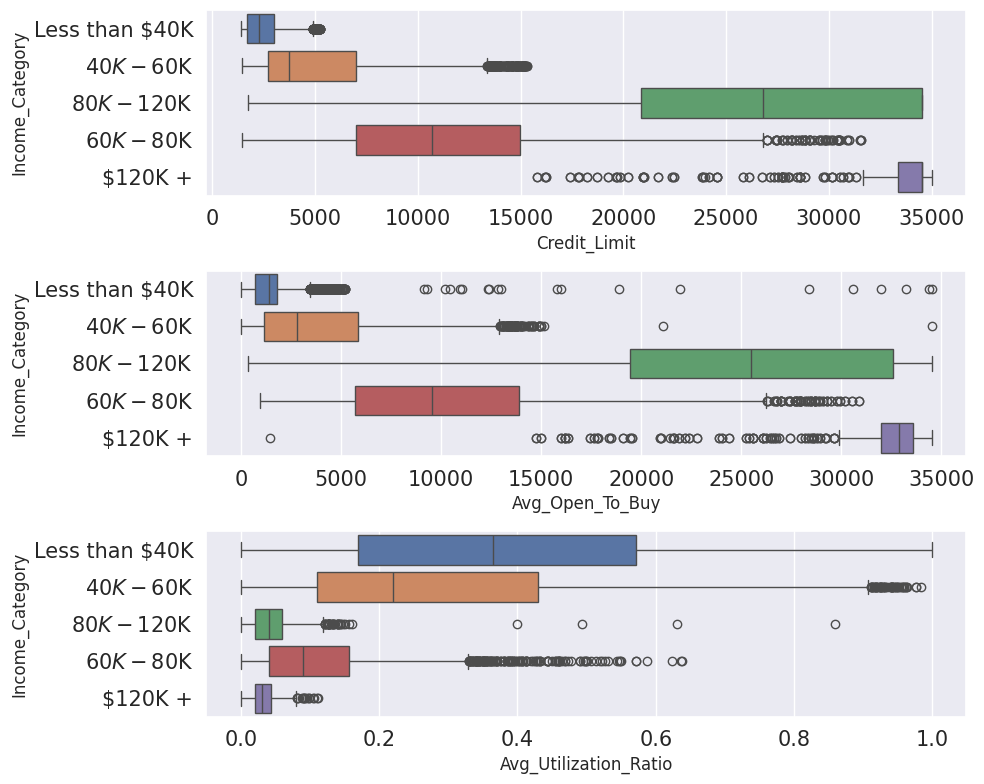

In [ ]:
fig, axes = plt.subplots(3,1, figsize = (10, 8))
sb.boxplot(y = creditData_cat["Income_Category"], x = creditData_num["Credit_Limit"], hue = creditData_cat["Income_Category"], ax = axes[0])
sb.boxplot(y = creditData_cat["Income_Category"], x = creditData_num["Avg_Open_To_Buy"], hue = creditData_cat["Income_Category"], ax = axes[1])
sb.boxplot(y = creditData_cat["Income_Category"], x = creditData_num["Avg_Utilization_Ratio"], hue = creditData_cat["Income_Category"], ax = axes[2])

plt.tight_layout()
plt.show()

In [ ]:
creditData = pd.DataFrame(creditData_num[["Credit_Limit", "Avg_Open_To_Buy", "Avg_Utilization_Ratio"]])
creditData.head()

,Credit_Limit,Avg_Open_To_Buy,Avg_Utilization_Ratio
0,1438.3,691.3,0.519
1,5756.0,5756.0,0.000
2,5756.0,5756.0,0.170
3,4315.0,3598.0,0.090
4,4315.0,3598.0,0.166


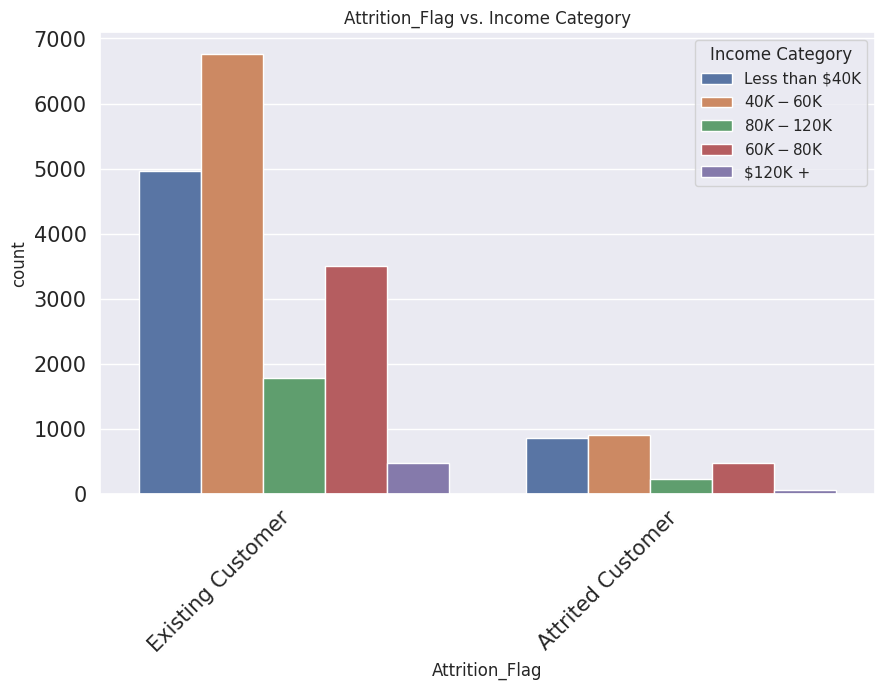

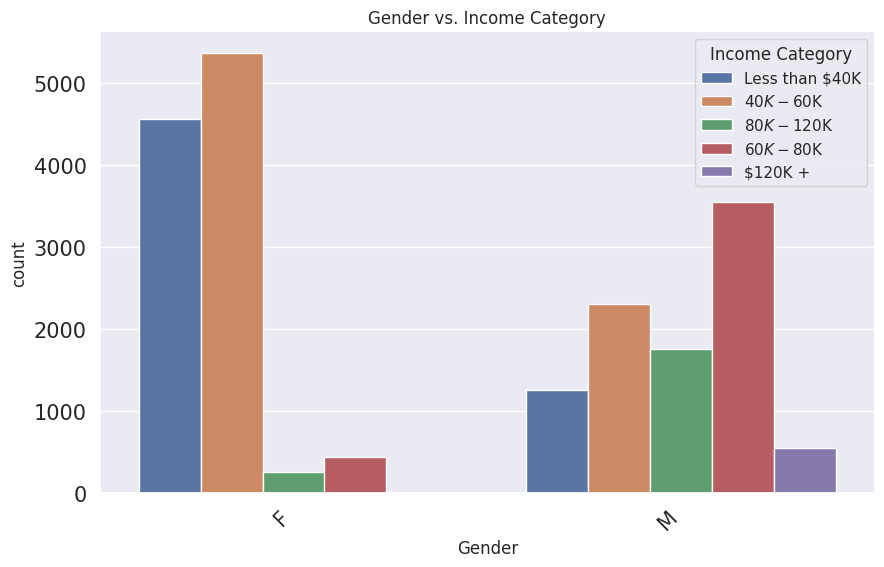

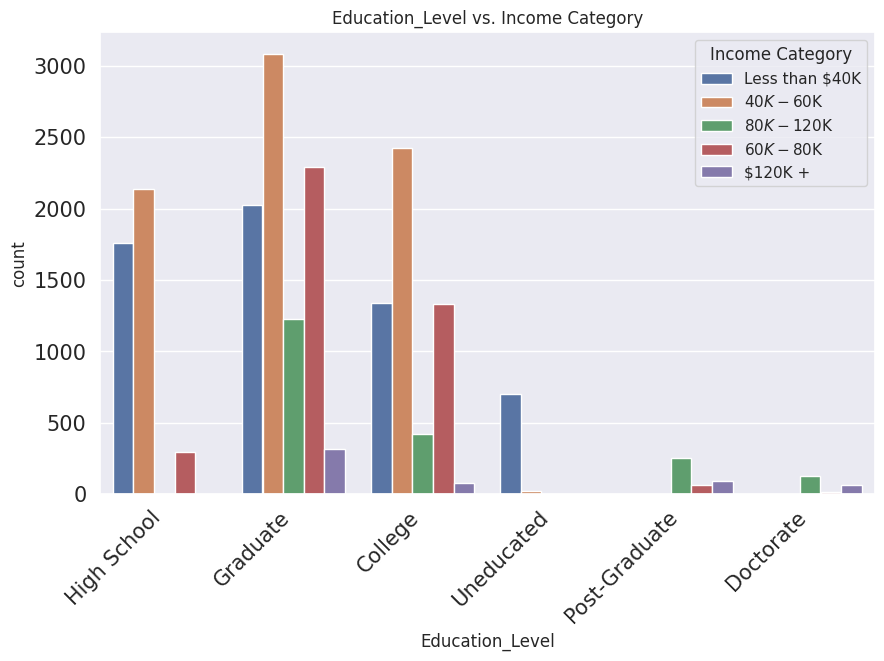

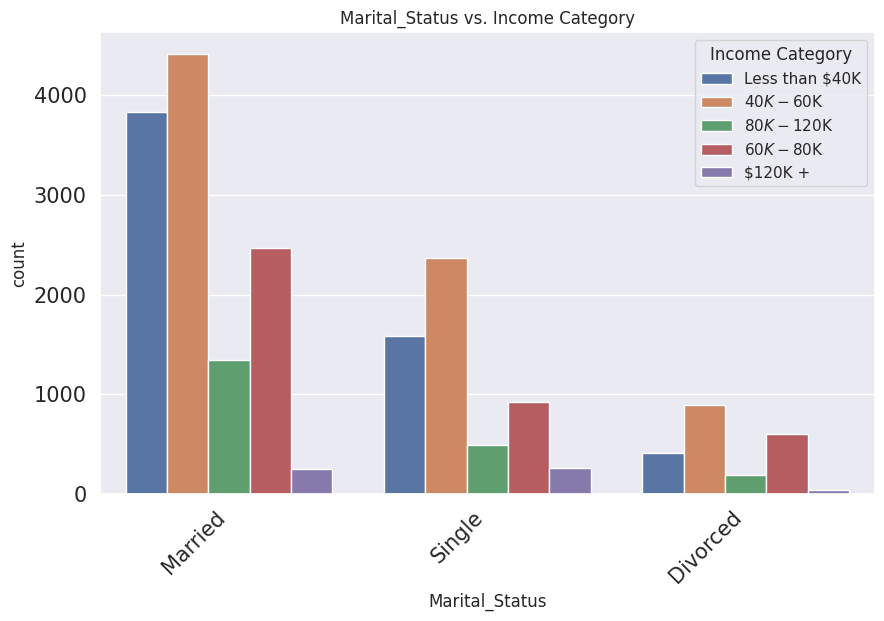

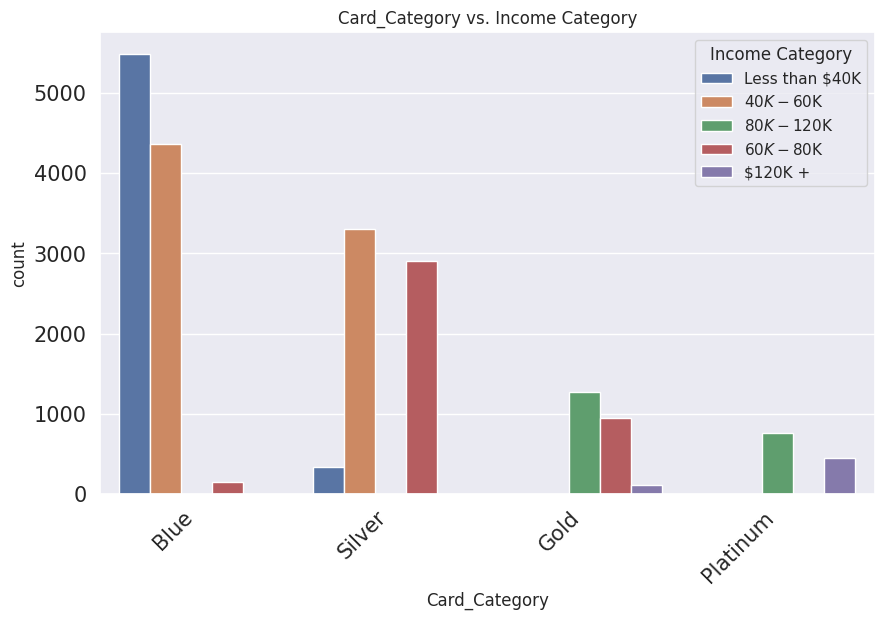

In [ ]:
# Categorical vs Income_Category:
for column in creditData_cat:
  if column != "Income_Category": # Omit Income_Category
    plt.figure(figsize=(10, 6))
    sb.countplot(x = creditData_cat[column], hue = creditData_cat['Income_Category'])
    plt.title(f'{column} vs. Income Category')
    plt.xticks(rotation = 45, ha = 'right')
    plt.legend(title = 'Income Category')
    plt.show()

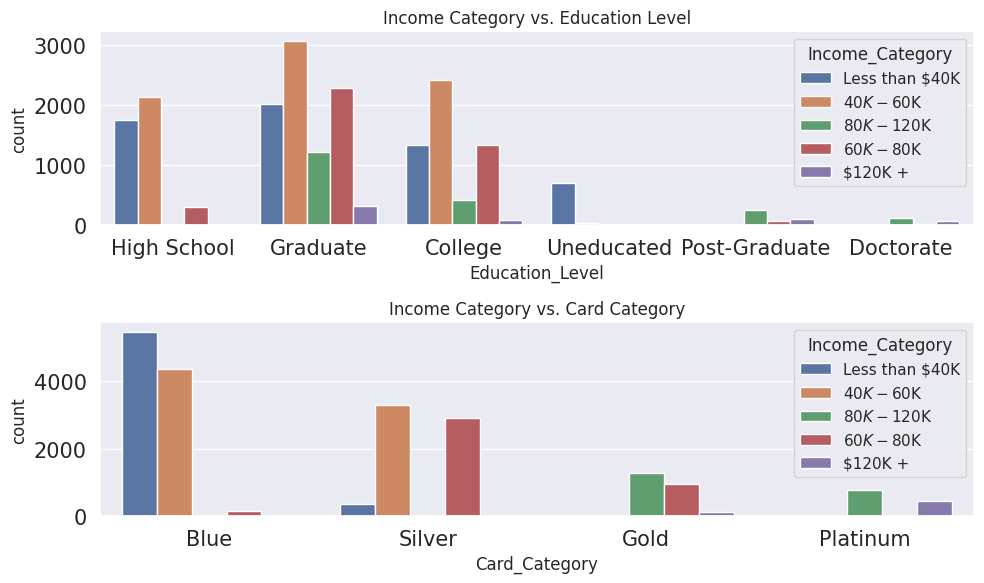

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# Mutual countplot of Education_Level and Income_Category
sb.countplot(x = "Education_Level", hue="Income_Category", data=allcreditData, ax=axes[0])
axes[0].set_title("Income Category vs. Education Level")

# Mutual countplot of Card_Category and Income_Category
sb.countplot(x = "Card_Category", hue="Income_Category", data=allcreditData, ax=axes[1])
axes[1].set_title("Income Category vs. Card Category")

plt.tight_layout()
plt.show()

From the mutual countplots, potential predictors are: "Education_Level" and "Income_Category".

In [ ]:
creditData[["Education_Level", "Income_Category", "Card_Category"]] = creditData_cat[["Education_Level", "Income_Category", "Card_Category"]]
creditData.head()

,Credit_Limit,Avg_Open_To_Buy,Avg_Utilization_Ratio,Education_Level,Income_Category,Card_Category
0,1438.3,691.3,0.519,High School,Less than $40K,Blue
1,5756.0,5756.0,0.000,Graduate,$40K - $60K,Silver
2,5756.0,5756.0,0.170,Graduate,$40K - $60K,Silver
3,4315.0,3598.0,0.090,College,Less than $40K,Blue
4,4315.0,3598.0,0.166,College,Less than $40K,Blue


# Data Cleaning
## 1. Remove outliers, remove any data we do not want (remove the specifc row(s))
## 2. Encode all Categorical Data

## Outlier Removal

We remove outliers first for: "Credit_Limit", "Avg_Open_To_Buy", and "Avg_Utilization_Ratio"

In [ ]:
# Make a new dataframe containing only the numeric variables
creditData_outlier = pd.DataFrame(creditData[["Credit_Limit","Avg_Open_To_Buy","Avg_Utilization_Ratio"]]).astype("float")
creditData_outlier.head()

,Credit_Limit,Avg_Open_To_Buy,Avg_Utilization_Ratio
0,1438.3,691.3,0.519
1,5756.0,5756.0,0.000
2,5756.0,5756.0,0.170
3,4315.0,3598.0,0.090
4,4315.0,3598.0,0.166


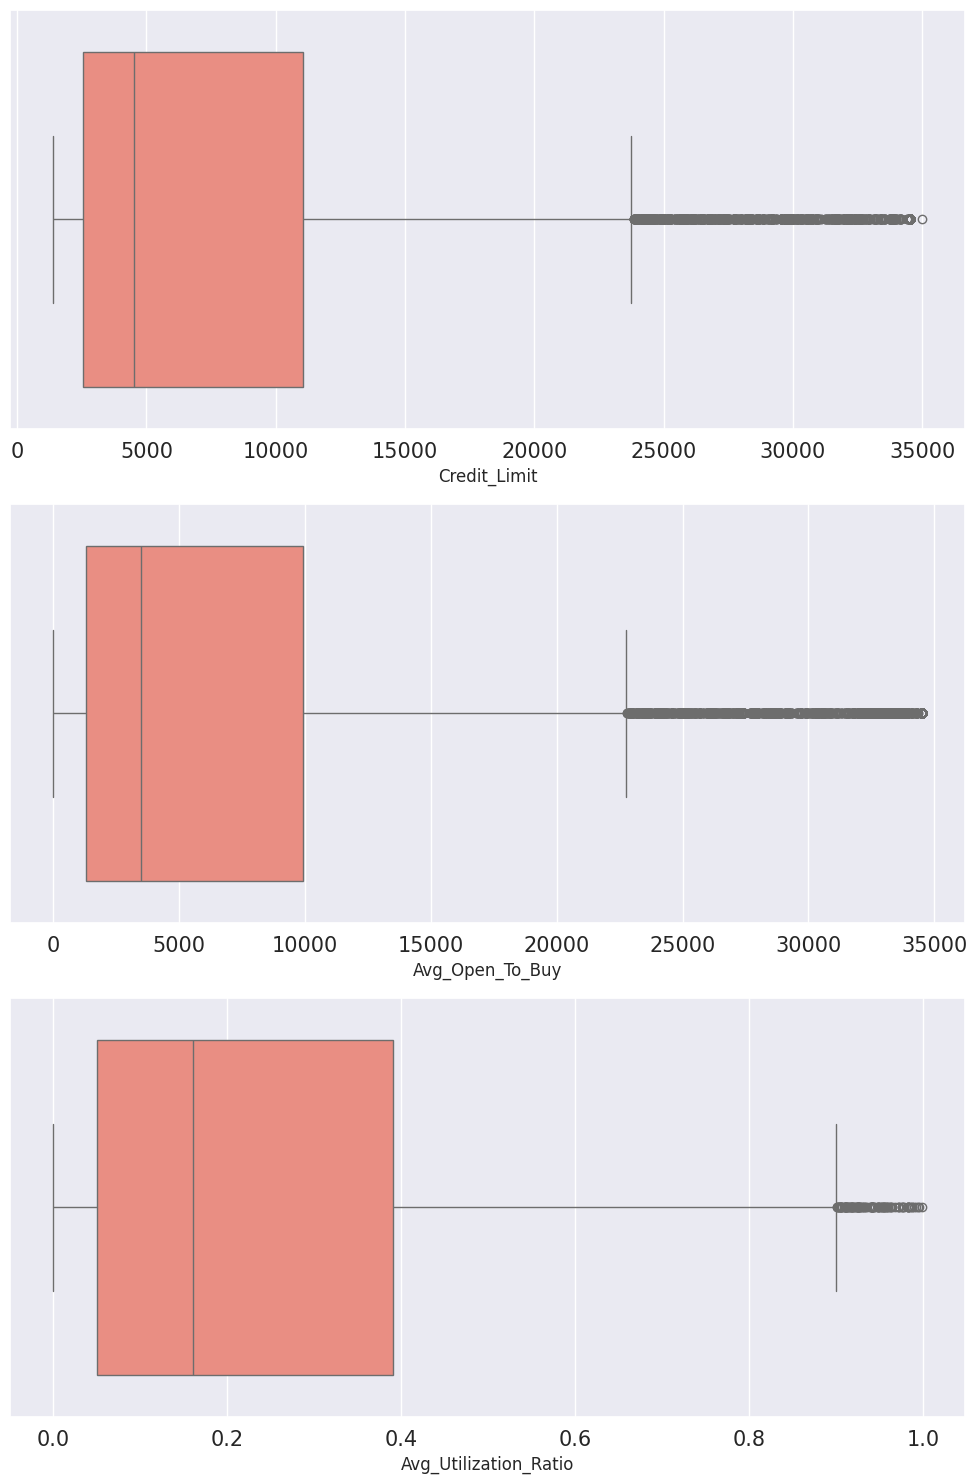

In [ ]:
fig, axes = plt.subplots(3,1, figsize = (10, 15))

sb.boxplot(data = creditData_num["Credit_Limit"], orient = "h", color = "salmon", ax = axes[0])
sb.boxplot(data = creditData_num["Avg_Open_To_Buy"], orient = "h", color = "salmon", ax = axes[1])
sb.boxplot(data = creditData_num["Avg_Utilization_Ratio"], orient = "h", color = "salmon", ax = axes[2])

plt.tight_layout()

In [ ]:
# Calculate: Q1, Q3, IQR, LB, and UB for the numeric predictor variables
Q1 = creditData_outlier[["Credit_Limit","Avg_Open_To_Buy","Avg_Utilization_Ratio"]].quantile(0.25)
Q3 = creditData_outlier[["Credit_Limit","Avg_Open_To_Buy","Avg_Utilization_Ratio"]].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

# Show how many outliers there are
((creditData_outlier[["Credit_Limit","Avg_Open_To_Buy","Avg_Utilization_Ratio"]] < LB) | (creditData_outlier[["Credit_Limit","Avg_Open_To_Buy","Avg_Utilization_Ratio"]] > UB)).sum()

,0
Credit_Limit,1952
Avg_Open_To_Buy,1895
Avg_Utilization_Ratio,114


In [ ]:
creditData_outlier_replaced = creditData_outlier.copy()

# Define outlier detection condition
outlier_condition = (creditData_outlier[["Credit_Limit","Avg_Open_To_Buy","Avg_Utilization_Ratio"]] < LB) | (creditData_outlier[["Credit_Limit","Avg_Open_To_Buy","Avg_Utilization_Ratio"]] > UB)

# Replace outliers with NaN
creditData_outlier_replaced.loc[outlier_condition.any(axis=1), ["Credit_Limit","Avg_Open_To_Buy","Avg_Utilization_Ratio"]] = np.nan

# Check for NaN values (should now show the number of replaced outliers)
display(creditData_outlier_replaced.isna().sum())

creditData_outlier_replaced.describe()

,0
Credit_Limit,2094
Avg_Open_To_Buy,2094
Avg_Utilization_Ratio,2094


,Credit_Limit,Avg_Open_To_Buy,Avg_Utilization_Ratio
count,17977.000000,17977.000000,17977.000000
mean,6174.383312,5019.990627,0.262729
std,5195.914782,5228.572626,0.230766
min,1400.000000,3.000000,0.000000
25%,2447.000000,1162.000000,0.078000
50%,3927.000000,2865.000000,0.191000
75%,8383.000000,7284.000000,0.420000
max,23760.000000,22754.000000,0.900000


In [ ]:
creditData_outlier_removed = creditData.copy()

new_credit_limit = creditData_outlier_replaced["Credit_Limit"]
new_avg_open_to_buy = creditData_outlier_replaced["Avg_Open_To_Buy"]
new_avg_utilization_ratio = creditData_outlier_replaced["Avg_Utilization_Ratio"]


# Replace corresponding columns
creditData_outlier_removed["Credit_Limit"] = new_credit_limit
creditData_outlier_removed["Avg_Open_To_Buy"] = new_avg_open_to_buy
creditData_outlier_removed["Avg_Utilization_Ratio"] = new_avg_utilization_ratio

# Remove rows with NaN values
creditData_outlier_removed = creditData_outlier_removed.dropna(subset=['Credit_Limit', 'Avg_Open_To_Buy', 'Credit_Limit'])

creditData_outlier_removed.describe(include = "all")

,Credit_Limit,Avg_Open_To_Buy,Avg_Utilization_Ratio,Education_Level,Income_Category,Card_Category
count,17977.000000,17977.000000,17977.000000,17977,17977,17977
unique,NaN,NaN,NaN,6,5,4
top,NaN,NaN,NaN,Graduate,$40K - $60K,Blue
freq,NaN,NaN,NaN,7775,7610,9873
mean,6174.383312,5019.990627,0.262729,NaN,NaN,NaN
std,5195.914782,5228.572626,0.230766,NaN,NaN,NaN
min,1400.000000,3.000000,0.000000,NaN,NaN,NaN
25%,2447.000000,1162.000000,0.078000,NaN,NaN,NaN
50%,3927.000000,2865.000000,0.191000,NaN,NaN,NaN
75%,8383.000000,7284.000000,0.420000,NaN,NaN,NaN


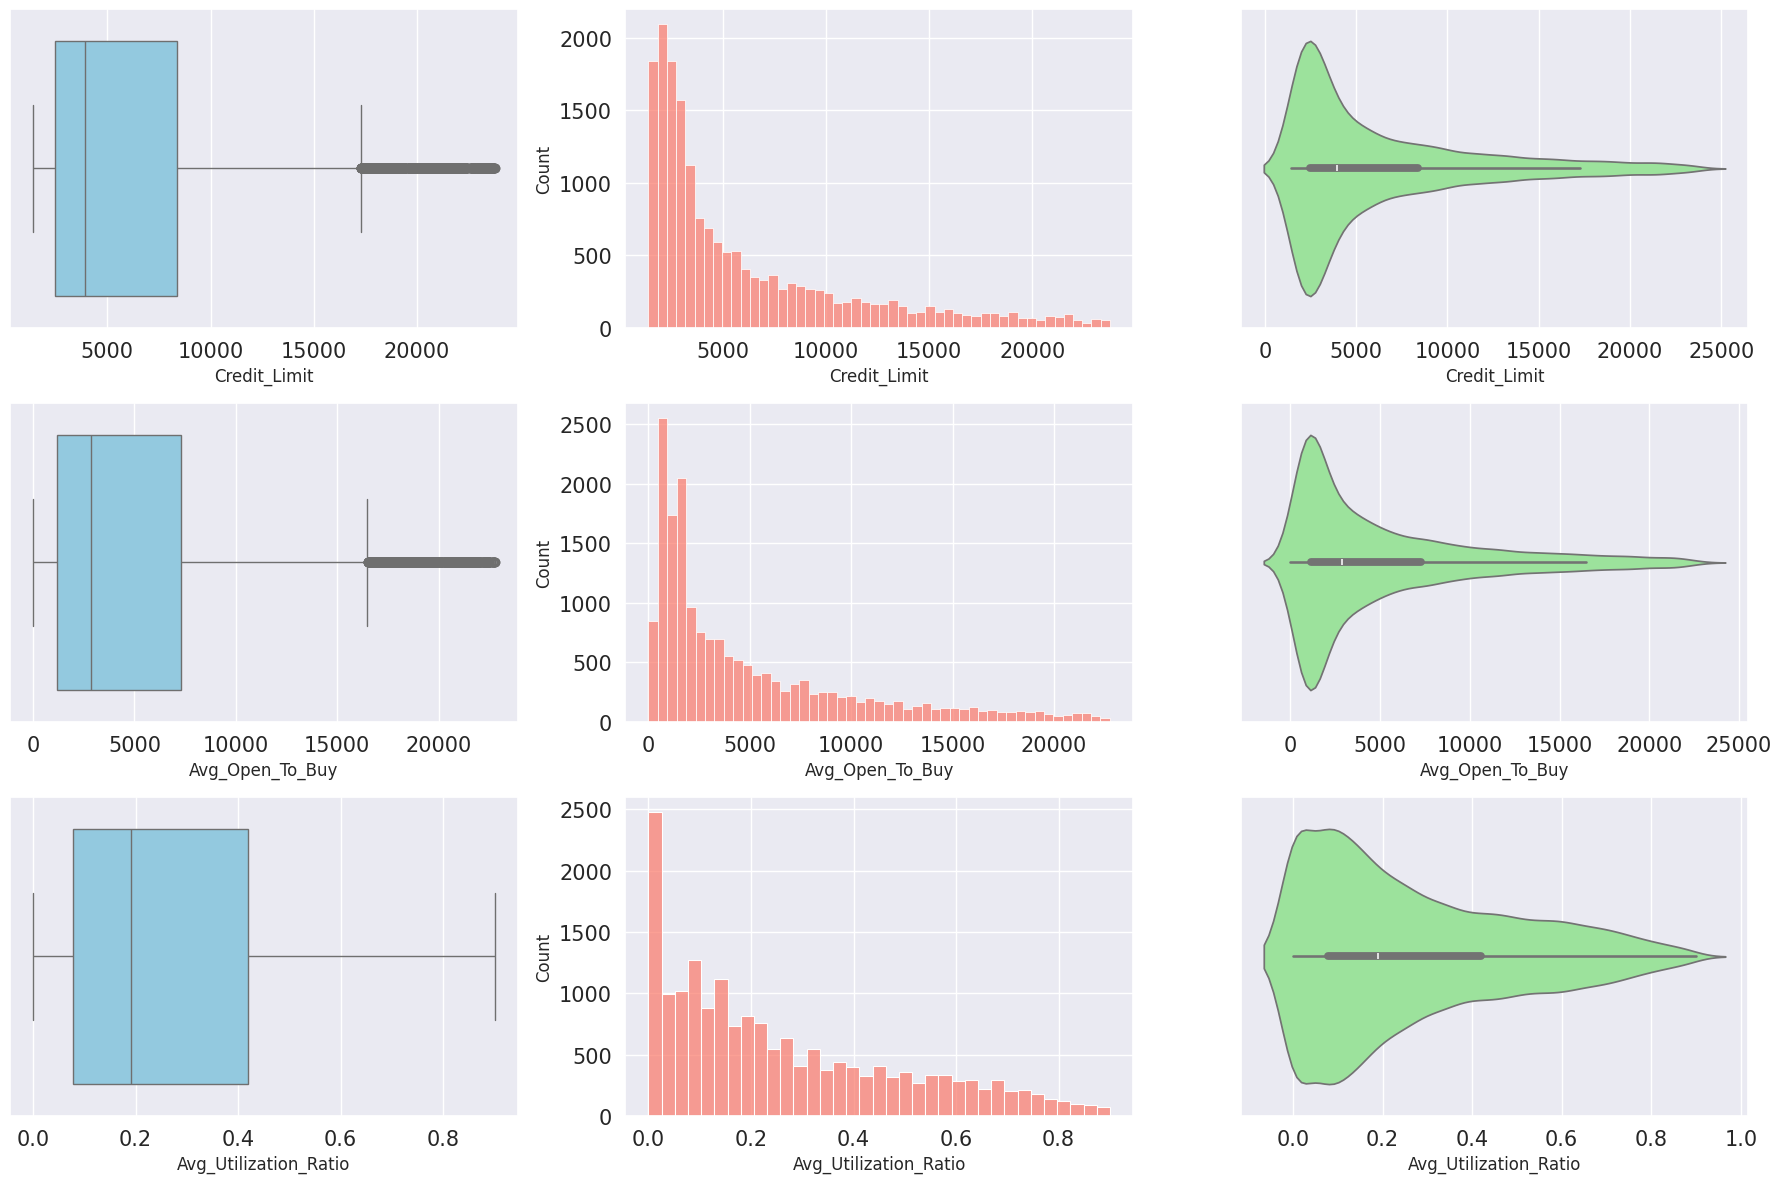

In [ ]:
fig, axes = plt.subplots(3,3, figsize = (18, 12))

sb.boxplot(data = creditData_outlier_removed, x = "Credit_Limit", ax = axes[0][0], color = "skyblue")
sb.histplot(data = creditData_outlier_removed, x = "Credit_Limit", ax = axes[0][1], color = "salmon")
sb.violinplot(data = creditData_outlier_removed, x = "Credit_Limit", ax = axes[0][2], color = "lightgreen")

sb.boxplot(data = creditData_outlier_removed, x = "Avg_Open_To_Buy", ax = axes[1][0], color = "skyblue")
sb.histplot(data = creditData_outlier_removed, x = "Avg_Open_To_Buy", ax = axes[1][1], color = "salmon")
sb.violinplot(data = creditData_outlier_removed, x = "Avg_Open_To_Buy", ax = axes[1][2], color = "lightgreen")

sb.boxplot(data = creditData_outlier_removed, x = "Avg_Utilization_Ratio", ax = axes[2][0], color = "skyblue")
sb.histplot(data = creditData_outlier_removed, x = "Avg_Utilization_Ratio", ax = axes[2][1], color = "salmon")
sb.violinplot(data = creditData_outlier_removed, x = "Avg_Utilization_Ratio", ax = axes[2][2], color = "lightgreen")

plt.tight_layout()

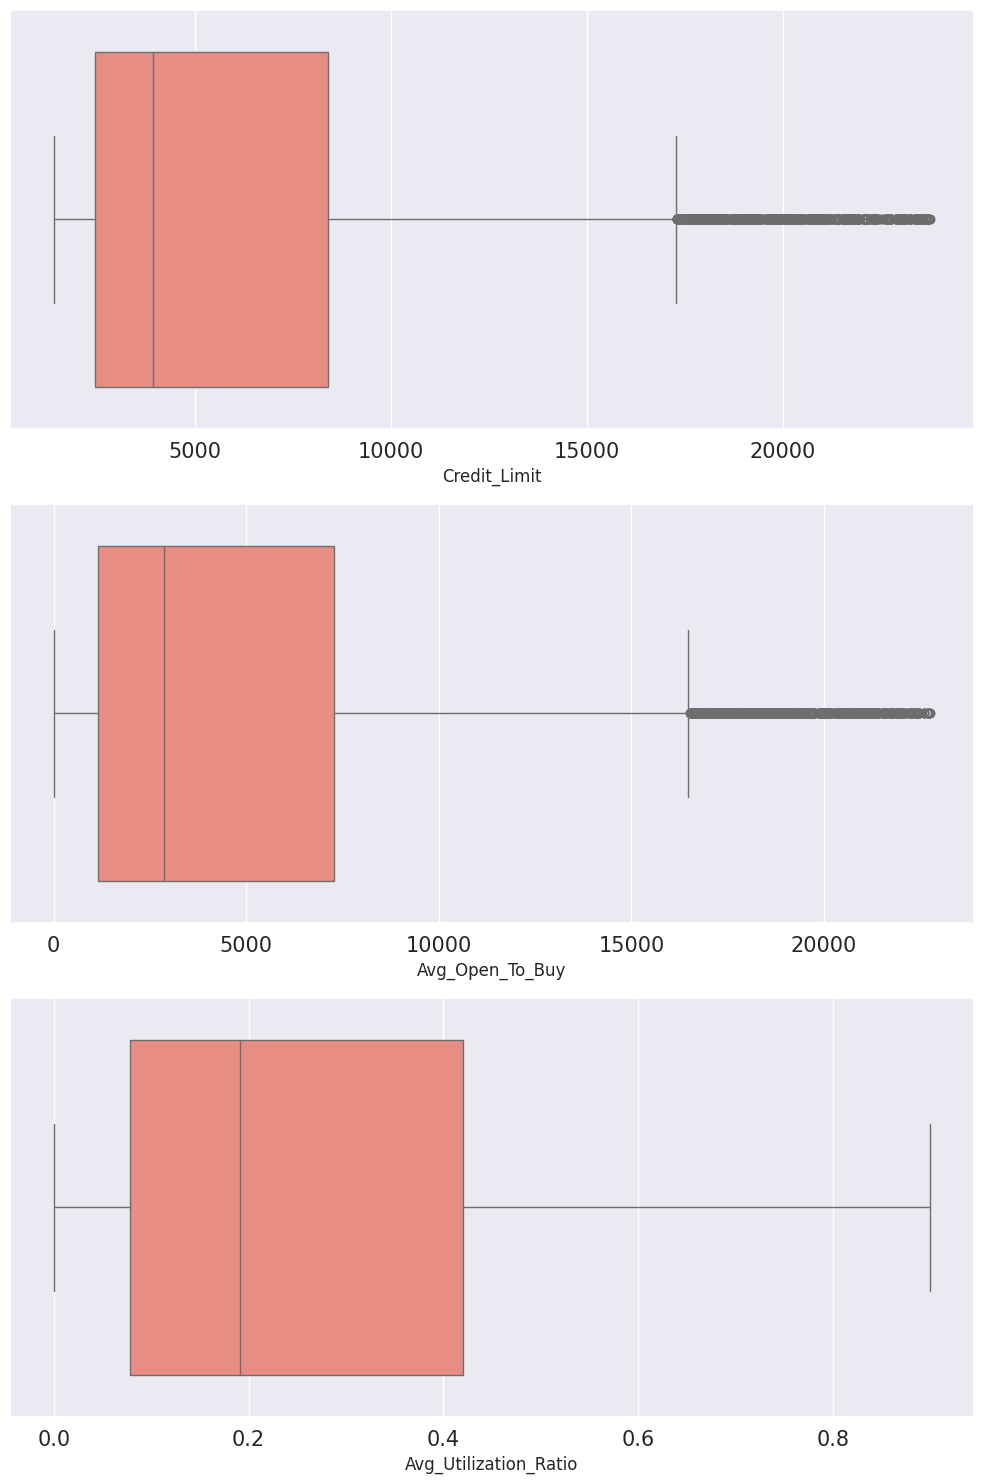

In [ ]:
fig, axes = plt.subplots(3,1, figsize = (10, 15))

sb.boxplot(data = creditData_outlier_removed["Credit_Limit"], orient = "h", color = "salmon", ax = axes[0])
sb.boxplot(data = creditData_outlier_removed["Avg_Open_To_Buy"], orient = "h", color = "salmon", ax = axes[1])
sb.boxplot(data = creditData_outlier_removed["Avg_Utilization_Ratio"], orient = "h", color = "salmon", ax = axes[2])

plt.tight_layout()

## Encoding

In [ ]:
# Create empty onehot encoding object
EN1 = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the "Education_Level" and "Card_Category" columns from the "creditData_outlier_removed" dataframe
encoded_features = EN1.fit_transform(creditData_outlier_removed[['Education_Level', 'Card_Category']])

# Convert the sparse matrix to a dense array
encoded_features_array = encoded_features.toarray()

# Create a new DataFrame with the encoded features
encoded_DF = pd.DataFrame(encoded_features_array, columns = EN1.get_feature_names_out(['Education_Level', 'Card_Category']))

# Concatenate the encoded DataFrame with the original DataFrame
creditData_encoded = pd.concat([creditData_outlier_removed.reset_index(drop=True), encoded_DF], axis=1)

# Drop the original 'Education_Level' and 'Card_Category' columns
creditData_encoded = creditData_encoded.drop(['Education_Level', 'Card_Category'], axis=1)

creditData_encoded.describe(include = "all")

,Credit_Limit,Avg_Open_To_Buy,Avg_Utilization_Ratio,Income_Category,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
count,17977.000000,17977.000000,17977.000000,17977,17977.000000,17977.000000,17977.000000,17977.000000,17977.000000,17977.000000,17977.000000,17977.000000,17977.000000,17977.000000
unique,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,$40K - $60K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,7610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6174.383312,5019.990627,0.262729,NaN,0.290482,0.002169,0.432497,0.231129,0.004395,0.039328,0.549202,0.086166,0.000334,0.364299
std,5195.914782,5228.572626,0.230766,NaN,0.453998,0.046528,0.495436,0.421566,0.066147,0.194380,0.497587,0.280616,0.018267,0.481246
min,1400.000000,3.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2447.000000,1162.000000,0.078000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3927.000000,2865.000000,0.191000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,8383.000000,7284.000000,0.420000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000


# Model Training
## Create and fit the models in this section

Split the data into train and test

In [ ]:
x1 = pd.DataFrame(creditData_encoded["Credit_Limit"]) # Predictor variable: Credit_Limit
x2 = pd.DataFrame(creditData_encoded["Avg_Open_To_Buy"]) # Predictor variable: Avg_Open_To_Buy
x3 = pd.DataFrame(creditData_encoded["Avg_Utilization_Ratio"]) # Predictor variable: Avg_Utilization_Ratio
x4 = pd.DataFrame(creditData_encoded[["Education_Level_College", "Education_Level_Doctorate",
                                      "Education_Level_Graduate", "Education_Level_High School",
                                      "Education_Level_Post-Graduate", "Education_Level_Uneducated"]]) # Predictor variable: Education_Level
x5 = pd.DataFrame(creditData_encoded[["Card_Category_Blue", "Card_Category_Gold",
                                      "Card_Category_Platinum", "Card_Category_Silver"]]) # Predictor variable: Card_Category

x_multi = pd.concat([x1, x2, x3, x4, x5], axis=1) # multivariate predictor

y = pd.DataFrame(creditData_encoded["Income_Category"]) # Response variable: Card_Category

split = creditData_encoded["Income_Category"].count() * 0.2 # 20% of data used as test data

x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size = int(split), random_state=42)
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size = int(split), random_state=42)
x3_train, x3_test, y_train, y_test = train_test_split(x3, y, test_size = int(split), random_state=42)
x4_train, x4_test, y_train, y_test = train_test_split(x4, y, test_size = int(split), random_state=42)
x5_train, x5_test, y_train, y_test = train_test_split(x5, y, test_size = int(split), random_state=42)
x_multi_train, x_multi_test, y_train, y_test = train_test_split(x_multi, y, test_size = int(split), random_state=42)

# Verify if data has been split properly
print("Credit_Limit:")
print(f"Train Data: {x1_train.shape} {y_train.shape}")
print(f"Test Data: {x1_test.shape} {y_test.shape}")
print()
print("Avg_Open_To_Buy:")
print(f"Train Data: {x2_train.shape} {y_train.shape}")
print(f"Test Data: {x2_test.shape} {y_test.shape}")
print()
print("Avg_Utilization_Ratio:")
print(f"Train Data: {x3_train.shape} {y_train.shape}")
print(f"Test Data: {x3_test.shape} {y_test.shape}")
print()
print("Education_Level:")
print(f"Train Data: {x4_train.shape} {y_train.shape}")
print(f"Test Data: {x4_test.shape} {y_test.shape}")
print()
print("Income_Category:")
print(f"Train Data: {x5_train.shape} {y_train.shape}")
print(f"Test Data: {x5_test.shape} {y_test.shape}")
print()
print("Multi-Predictor:")
print(f"Train Data: {x_multi_train.shape} {y_train.shape}")
print(f"Test Data: {x_multi_test.shape} {y_test.shape}")

Credit_Limit:
Train Data: (14382, 1) (14382, 1)
Test Data: (3595, 1) (3595, 1)

Avg_Open_To_Buy:
Train Data: (14382, 1) (14382, 1)
Test Data: (3595, 1) (3595, 1)

Avg_Utilization_Ratio:
Train Data: (14382, 1) (14382, 1)
Test Data: (3595, 1) (3595, 1)

Education_Level:
Train Data: (14382, 6) (14382, 1)
Test Data: (3595, 6) (3595, 1)

Income_Category:
Train Data: (14382, 4) (14382, 1)
Test Data: (3595, 4) (3595, 1)

Multi-Predictor:
Train Data: (14382, 13) (14382, 1)
Test Data: (3595, 13) (3595, 1)


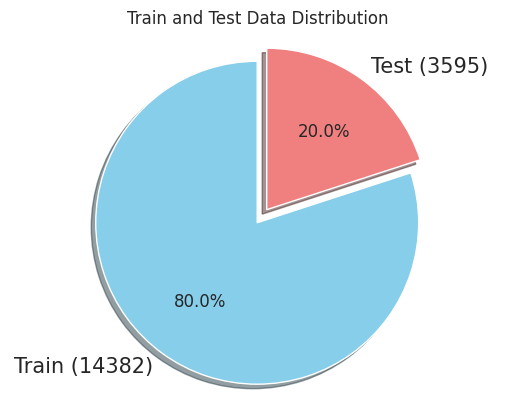

In [ ]:
train_count = len(y_train)
test_count = len(y_test)

# Create a pie chart
labels = [f'Train ({train_count})', f'Test ({test_count})']  # Include counts in labels
sizes = [train_count, test_count]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  # Explode the train slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Train and Test Data Distribution')
plt.show()

## Model 1: Random Forest

In [ ]:
rf1=RandomForestClassifier (n_estimators=100,random_state=42)
rf2=RandomForestClassifier (n_estimators=100,random_state=42)
rf3=RandomForestClassifier (n_estimators=100,random_state=42)
rf4=RandomForestClassifier (n_estimators=100,random_state=42)
rf5=RandomForestClassifier (n_estimators=100,random_state=42)
rfmulti=RandomForestClassifier (n_estimators=100,random_state=42)

rf1.fit(x1_train,y_train)
rf2.fit(x2_train,y_train)
rf3.fit(x3_train,y_train)
rf4.fit(x4_train,y_train)
rf5.fit(x5_train,y_train)
rfmulti.fit(x_multi_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred1=rf1.predict(x1_test)
y_pred2=rf2.predict(x2_test)
y_pred3=rf3.predict(x3_test)
y_pred4=rf4.predict(x4_test)
y_pred5=rf5.predict(x5_test)
y_pred_multi=rfmulti.predict(x_multi_test)

acc1=round(accuracy_score(y_test,y_pred1),3)
acc2=round(accuracy_score(y_test,y_pred2),3)
acc3=round(accuracy_score(y_test,y_pred3),3)
acc4=round(accuracy_score(y_test,y_pred4),3)
acc5=round(accuracy_score(y_test,y_pred5),3)
accmulti=round(accuracy_score(y_test,y_pred_multi),3)

print("Accuracy for Credit_Limit:",acc1)
print("Accuracy for Avg_Open_To_Buy:",acc2)
print("Accuracy for Avg_Utilization_Ratio:",acc3)
print("Accuracy for Education_Level:",acc4)
print("Accuracy for Income_Category:",acc5)
print("Accuracy for multi-variable predictor:",accmulti)

Accuracy for Credit_Limit: 0.89
Accuracy for Avg_Open_To_Buy: 0.747
Accuracy for Avg_Utilization_Ratio: 0.481
Accuracy for Education_Level: 0.459
Accuracy for Income_Category: 0.518
Accuracy for multi-variable predictor: 0.813


Text(0.5, 1.0, 'Random Forest Confusion Matrix for multi-variable predictor (Train Data)')

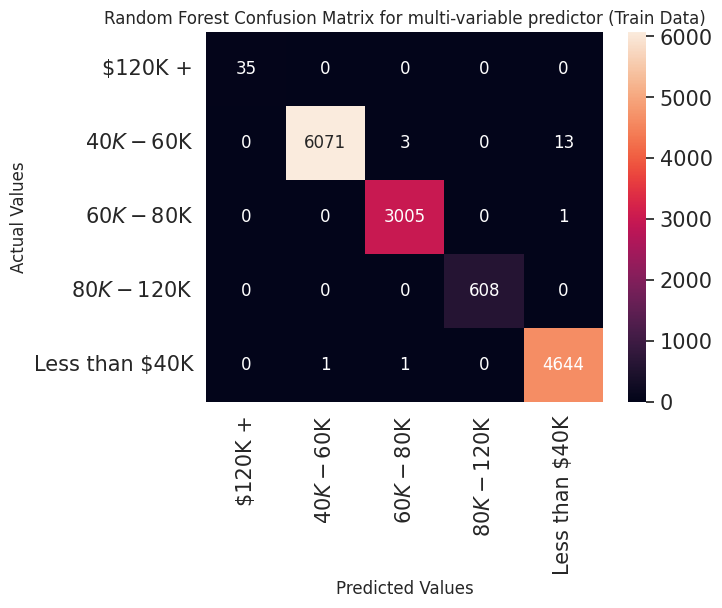

In [ ]:
y_pred_multi_train = rfmulti.predict(x_multi_train)
CM = confusion_matrix(y_train, y_pred_multi_train)

fig = sb.heatmap(CM, annot = True, fmt = "g", xticklabels = rfmulti.classes_, yticklabels = rfmulti.classes_)
fig.set_xlabel("Predicted Values")
fig.set_ylabel("Actual Values")
plt.title("Random Forest Confusion Matrix for multi-variable predictor (Train Data)")

Text(0.5, 1.0, 'Random Forest Confusion Matrix for multi-variable predictor (Test Data)')

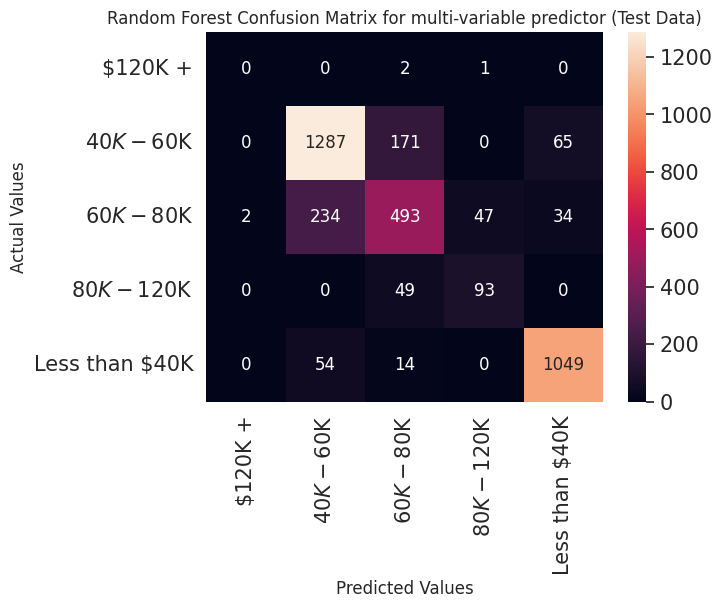

In [ ]:
CM = confusion_matrix(y_test, y_pred_multi)

fig = sb.heatmap(CM, annot = True, fmt = "g",xticklabels=rfmulti.classes_, yticklabels=rfmulti.classes_)
fig.set_xlabel("Predicted Values")
fig.set_ylabel("Actual Values")
plt.title("Random Forest Confusion Matrix for multi-variable predictor (Test Data)")

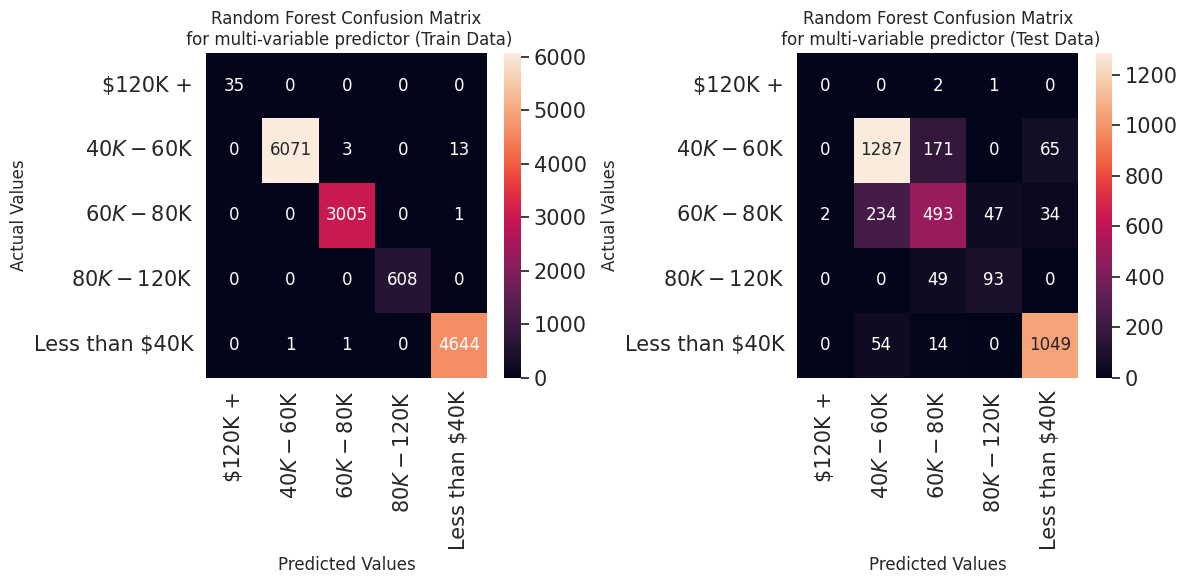

In [ ]:
# Plot the CMs side by side

fig, axes = plt.subplots(1,2, figsize = (12, 6))
CM = confusion_matrix(y_train, y_pred_multi_train)

sb.heatmap(CM, annot = True, fmt = "g", xticklabels = rfmulti.classes_, yticklabels = rfmulti.classes_, ax = axes[0])
axes[0].set_xlabel("Predicted Values")
axes[0].set_ylabel("Actual Values")
axes[0].set_title("Random Forest Confusion Matrix\n for multi-variable predictor (Train Data)")

CM = confusion_matrix(y_test, y_pred_multi)

sb.heatmap(CM, annot = True, fmt = "g",xticklabels=rfmulti.classes_, yticklabels=rfmulti.classes_, ax = axes[1])
axes[1].set_xlabel("Predicted Values")
axes[1].set_ylabel("Actual Values")
axes[1].set_title("Random Forest Confusion Matrix\n for multi-variable predictor (Test Data)")

plt.tight_layout()
plt.show()

In [ ]:
print("Train Accuracy for multi-variable predictor:", round(accuracy_score(y_train,y_pred_multi_train),3))
print("Test Accuracy for multi-variable predictor:", accmulti)

Train Accuracy for multi-variable predictor: 0.999
Test Accuracy for multi-variable predictor: 0.813


In [ ]:
report = classification_report(y_test, y_pred_multi)
print(report)

                precision    recall  f1-score   support

       $120K +       0.00      0.00      0.00         3
   $40K - $60K       0.82      0.85      0.83      1523
   $60K - $80K       0.68      0.61      0.64       810
  $80K - $120K       0.66      0.65      0.66       142
Less than $40K       0.91      0.94      0.93      1117

      accuracy                           0.81      3595
     macro avg       0.61      0.61      0.61      3595
  weighted avg       0.81      0.81      0.81      3595



<function matplotlib.pyplot.show(close=None, block=None)>

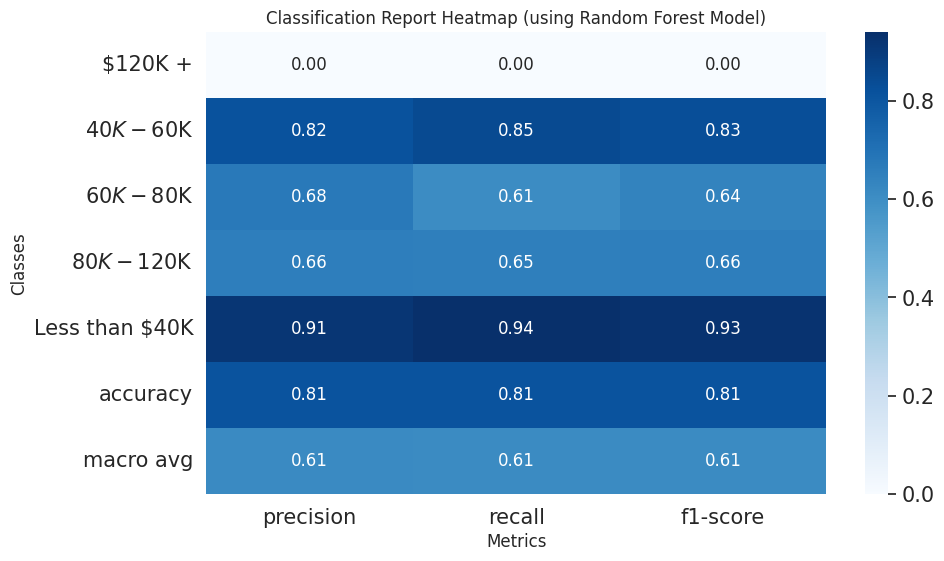

In [ ]:
# Generate classification report
report = classification_report(y_test, y_pred_multi, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Create heatmap
plt.figure(figsize=(10, 6))
sb.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")  # Exclude support and accuracy
plt.title('Classification Report Heatmap (using Random Forest Model)')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show

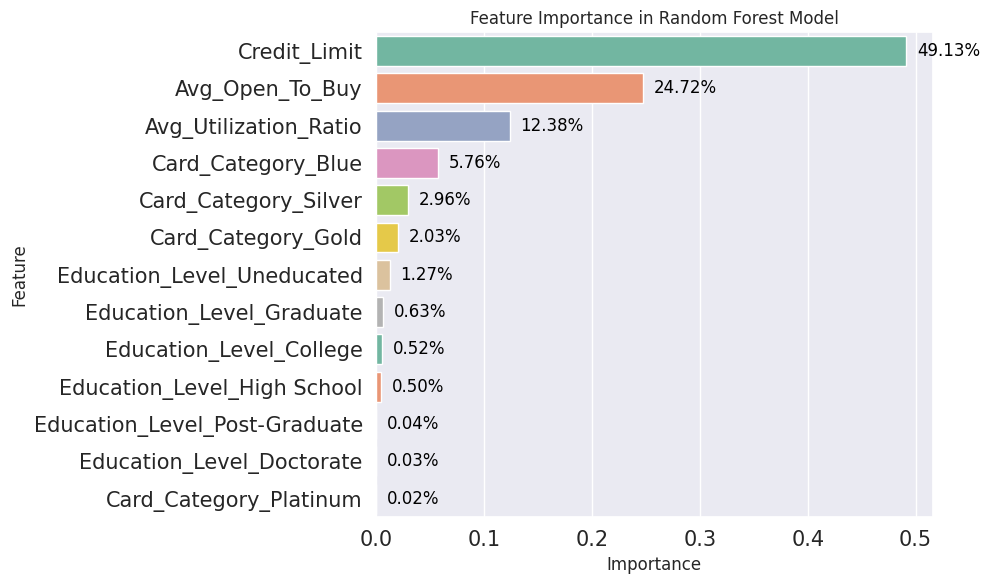

In [ ]:
# Get feature importance from the multi-predictor model (rfmulti)
importances = rfmulti.feature_importances_

# Get feature names
feature_names = x_multi_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Calculate percentage importance for each feature
total_importance = importance_df['Importance'].sum()
importance_df['Percentage'] = (importance_df['Importance'] / total_importance) * 100

# Plot feature importances with percentage labels
plt.figure(figsize=(10, 6))
sb.barplot(x='Importance', y='Feature', data=importance_df, palette = "Set2")
plt.title('Feature Importance in Random Forest Model')

# Add percentage labels to bars
for i, v in enumerate(importance_df['Importance']):
    plt.text(v + 0.01, i, f'{importance_df["Percentage"].iloc[i]:.2f}%', color='black', va='center')

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

## Model 2: Gradient Boosting



In [ ]:
# Initialize Gradient Boosting models
gb1 = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb2 = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb3 = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb4 = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb5 = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_multi = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train models with respective predictor variables
gb1.fit(x1_train, y_train)
gb2.fit(x2_train, y_train)
gb3.fit(x3_train, y_train)
gb4.fit(x4_train, y_train)
gb5.fit(x5_train, y_train)
gb_multi.fit(x_multi_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Predict on test sets, ensuring x1_test has the same number of rows as y_test
y_pred1 = gb1.predict(x1_test)
y_pred2 = gb2.predict(x2_test)
y_pred3 = gb3.predict(x3_test)
y_pred4 = gb4.predict(x4_test)
y_pred5 = gb5.predict(x5_test)
y_pred_multi = gb_multi.predict(x_multi_test)

# Calculate accuracy scores
acc1 = round(accuracy_score(y_test,y_pred1),3)
acc2 = round(accuracy_score(y_test,y_pred2),3)
acc3 = round(accuracy_score(y_test,y_pred3),3)
acc4 = round(accuracy_score(y_test,y_pred4),3)
acc5 = round(accuracy_score(y_test,y_pred5),3)
acc_multi = round(accuracy_score(y_test,y_pred_multi),3)

# Print accuracy scores
print("Accuracy for Credit_Limit:", acc1)
print("Accuracy for Avg_Open_To_Buy:", acc2)
print("Accuracy for Avg_Utilization_Ratio:", acc3)
print("Accuracy for Education_Level:", acc4)
print("Accuracy for Income_Category:", acc5)
print("Accuracy for multi-variable predictor:", acc_multi)

Accuracy for Credit_Limit: 0.786
Accuracy for Avg_Open_To_Buy: 0.615
Accuracy for Avg_Utilization_Ratio: 0.484
Accuracy for Education_Level: 0.459
Accuracy for Income_Category: 0.524
Accuracy for multi-variable predictor: 0.793


Text(0.5, 1.0, 'Gradient Boosting Confusion Matrix for multi-variable predictor (Train Data)')

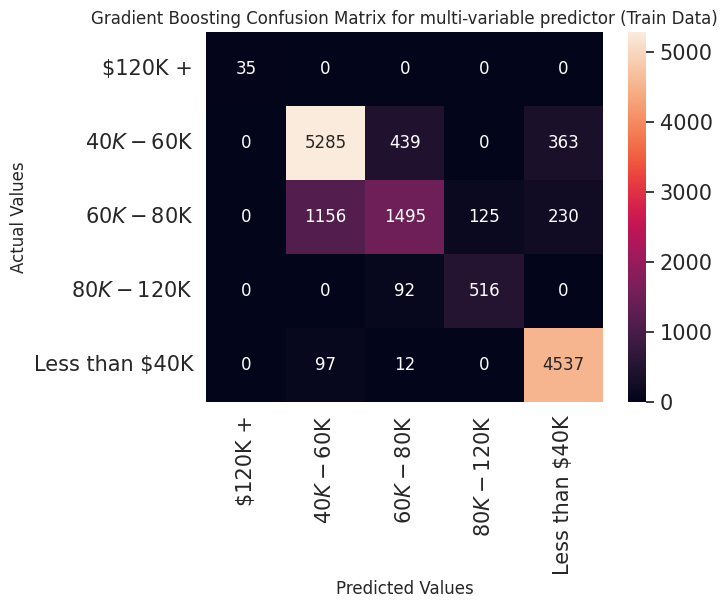

In [ ]:
y_pred_multi_train = gb_multi.predict(x_multi_train)
CM = confusion_matrix(y_train, y_pred_multi_train)

fig = sb.heatmap(CM, annot = True, fmt = "g", xticklabels = gb_multi.classes_, yticklabels = gb_multi.classes_)
fig.set_xlabel("Predicted Values")
fig.set_ylabel("Actual Values")
plt.title("Gradient Boosting Confusion Matrix for multi-variable predictor (Train Data)")

Text(0.5, 1.0, 'Gradient Boosting Confusion Matrix for multi-variable predictor (Test Data)')

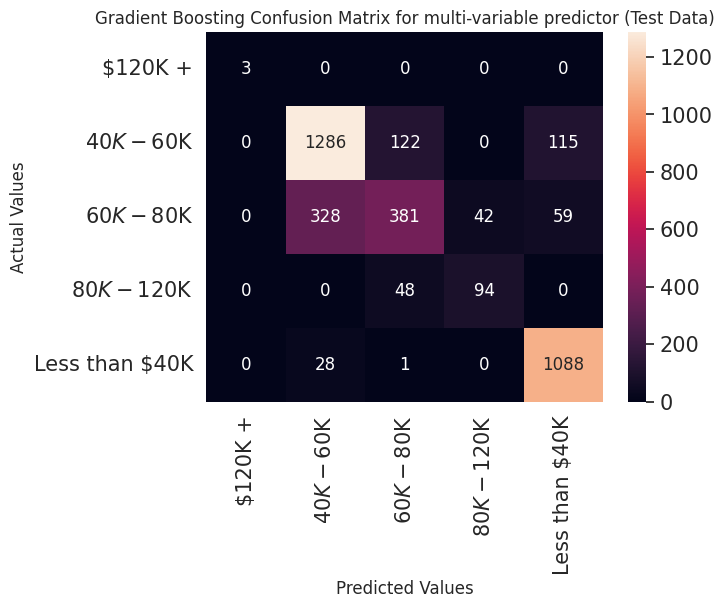

In [ ]:
CM = confusion_matrix(y_test, y_pred_multi)

fig = sb.heatmap(CM, annot = True, fmt = "g", xticklabels = gb_multi.classes_, yticklabels = gb_multi.classes_)
fig.set_xlabel("Predicted Values")
fig.set_ylabel("Actual Values")
plt.title("Gradient Boosting Confusion Matrix for multi-variable predictor (Test Data)")

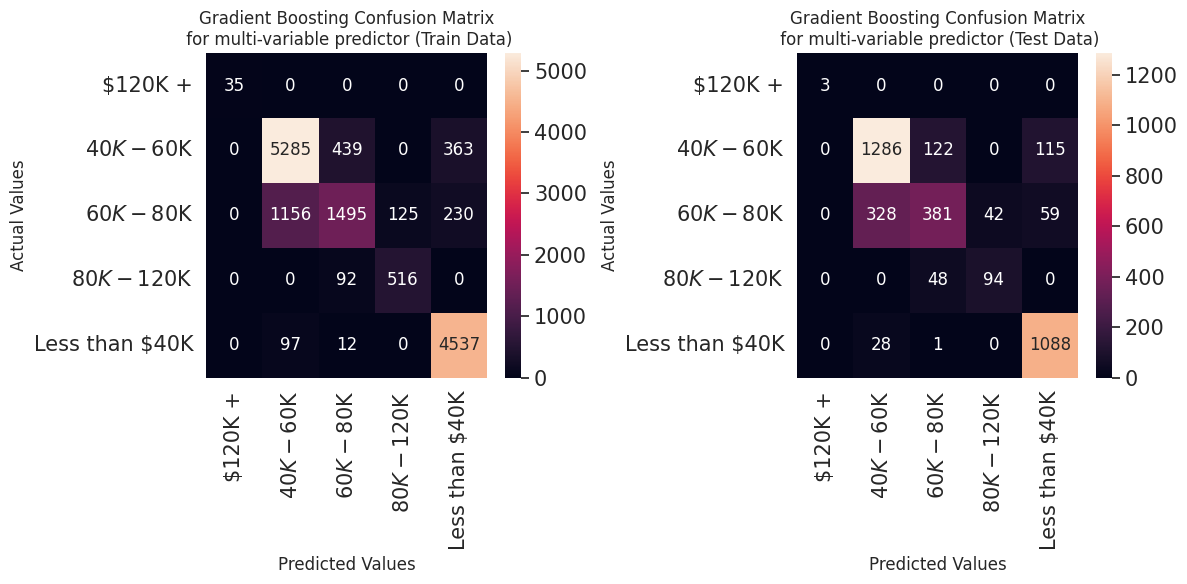

In [ ]:
# Plot the CMs side by side

fig, axes = plt.subplots(1,2, figsize = (12, 6))
CM = confusion_matrix(y_train, y_pred_multi_train)

sb.heatmap(CM, annot = True, fmt = "g", xticklabels = gb_multi.classes_, yticklabels = gb_multi.classes_, ax = axes[0])
axes[0].set_xlabel("Predicted Values")
axes[0].set_ylabel("Actual Values")
axes[0].set_title("Gradient Boosting Confusion Matrix\n for multi-variable predictor (Train Data)")

CM = confusion_matrix(y_test, y_pred_multi)

sb.heatmap(CM, annot = True, fmt = "g",xticklabels = gb_multi.classes_, yticklabels = gb_multi.classes_, ax = axes[1])
axes[1].set_xlabel("Predicted Values")
axes[1].set_ylabel("Actual Values")
axes[1].set_title("Gradient Boosting Confusion Matrix\n for multi-variable predictor (Test Data)")

plt.tight_layout()
plt.show()

In [ ]:
print("Train Accuracy for multi-variable predictor:", round(accuracy_score(y_train,y_pred_multi_train),3))
print("Test Accuracy for multi-variable predictor:", acc_multi)

Train Accuracy for multi-variable predictor: 0.825
Test Accuracy for multi-variable predictor: 0.793


In [ ]:
print("\nClassification Report for multi predictor:")
print(classification_report(y_test, y_pred_multi))


Classification Report for multi predictor:
                precision    recall  f1-score   support

       $120K +       1.00      1.00      1.00         3
   $40K - $60K       0.78      0.84      0.81      1523
   $60K - $80K       0.69      0.47      0.56       810
  $80K - $120K       0.69      0.66      0.68       142
Less than $40K       0.86      0.97      0.91      1117

      accuracy                           0.79      3595
     macro avg       0.81      0.79      0.79      3595
  weighted avg       0.78      0.79      0.78      3595



<function matplotlib.pyplot.show(close=None, block=None)>

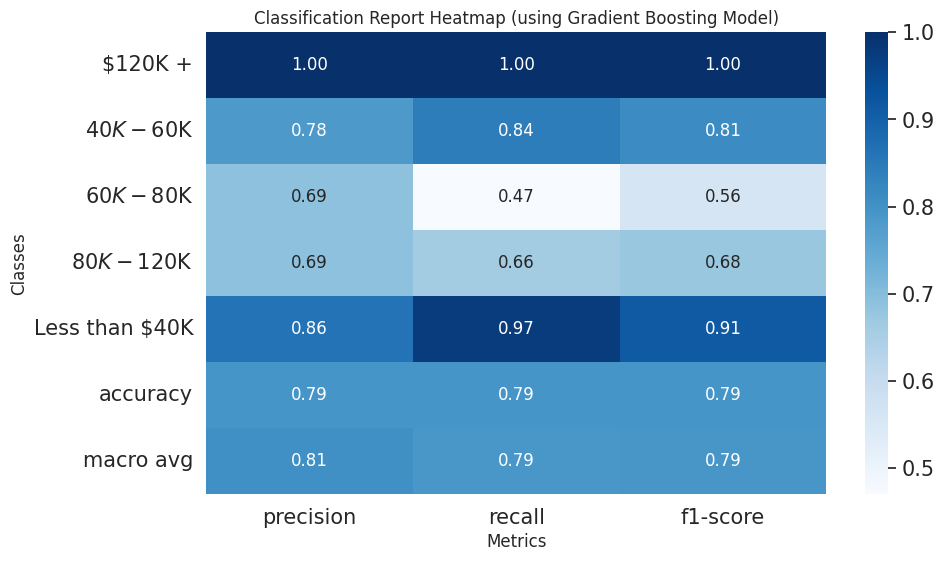

In [ ]:
# Generate classification report
report = classification_report(y_test, y_pred_multi, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Create heatmap
plt.figure(figsize=(10, 6))
sb.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")  # Exclude support and accuracy
plt.title('Classification Report Heatmap (using Gradient Boosting Model)')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show

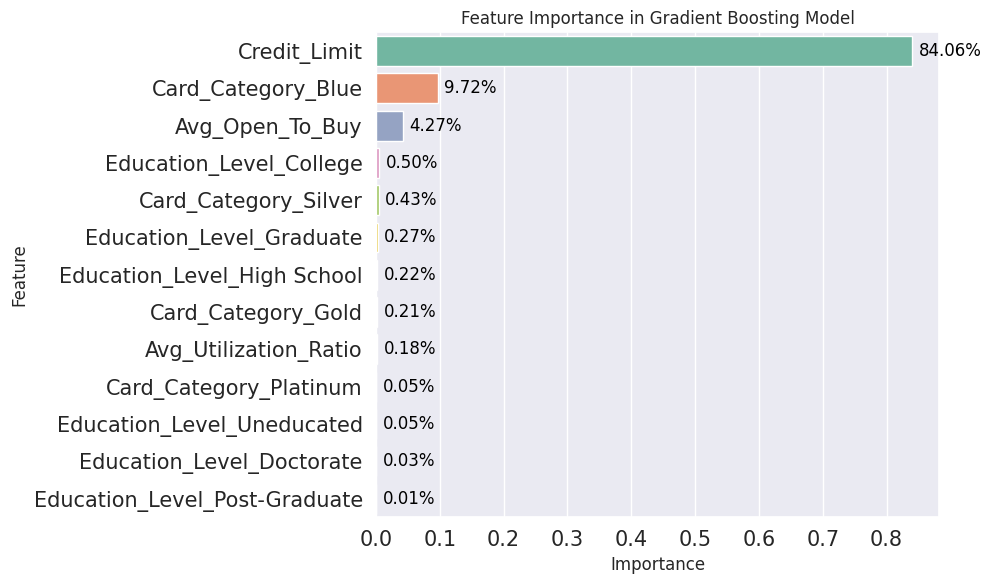

In [ ]:
# Get feature importance from the multi-predictor model (gb_multi)
importances = gb_multi.feature_importances_

# Get feature names
feature_names = x_multi_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Calculate percentage importance for each feature
total_importance = importance_df['Importance'].sum()
importance_df['Percentage'] = (importance_df['Importance'] / total_importance) * 100

# Plot feature importances with percentage labels
plt.figure(figsize=(10, 6))
sb.barplot(x='Importance', y='Feature', data=importance_df, palette = "Set2")
plt.title('Feature Importance in Gradient Boosting Model')

# Add percentage labels to bars
for i, v in enumerate(importance_df['Importance']):
    plt.text(v + 0.01, i, f'{importance_df["Percentage"].iloc[i]:.2f}%', color='black', va='center')

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

## Model 3: Multi-Variate Decison Tree

In [ ]:
# Initialize Decision Tree models
dt1 = DecisionTreeClassifier(max_depth = 100, random_state=42)
dt2 = DecisionTreeClassifier(max_depth = 100, random_state=42)
dt3 = DecisionTreeClassifier(max_depth = 100, random_state=42)
dt4 = DecisionTreeClassifier(max_depth = 100, random_state=42)
dt5 = DecisionTreeClassifier(max_depth = 100, random_state=42)
dt_multi = DecisionTreeClassifier(max_depth = 100, random_state=42)

# Train models with respective predictor variables
dt1.fit(x1_train, y_train)
dt2.fit(x2_train, y_train)
dt3.fit(x3_train, y_train)
dt4.fit(x4_train, y_train)
dt5.fit(x5_train, y_train)
dt_multi.fit(x_multi_train, y_train)

DecisionTreeClassifier(max_depth=100, random_state=42)

In [ ]:
# Predict on test sets, ensuring x1_test has the same number of rows as y_test
y_pred1 = dt1.predict(x1_test)
y_pred2 = dt2.predict(x2_test)
y_pred3 = dt3.predict(x3_test)
y_pred4 = dt4.predict(x4_test)
y_pred5 = dt5.predict(x5_test)
y_pred_multi = dt_multi.predict(x_multi_test)

# Calculate accuracy scores
acc1 = round(accuracy_score(y_test,y_pred1),3)
acc2 = round(accuracy_score(y_test,y_pred2),3)
acc3 = round(accuracy_score(y_test,y_pred3),3)
acc4 = round(accuracy_score(y_test,y_pred4),3)
acc5 = round(accuracy_score(y_test,y_pred5),3)
acc_multi = round(accuracy_score(y_test,y_pred_multi),3)

# Print accuracy scores
print("Accuracy for Credit_Limit:", acc1)
print("Accuracy for Avg_Open_To_Buy:", acc2)
print("Accuracy for Avg_Utilization_Ratio:", acc3)
print("Accuracy for Education_Level:", acc4)
print("Accuracy for Income_Category:", acc5)
print("Accuracy for multi-variable predictor:", acc_multi)

Accuracy for Credit_Limit: 0.89
Accuracy for Avg_Open_To_Buy: 0.747
Accuracy for Avg_Utilization_Ratio: 0.484
Accuracy for Education_Level: 0.459
Accuracy for Income_Category: 0.524
Accuracy for multi-variable predictor: 0.866


Text(0.5, 1.0, 'Decision Tree Confusion Matrix for multi-variable predictor (Train Data)')

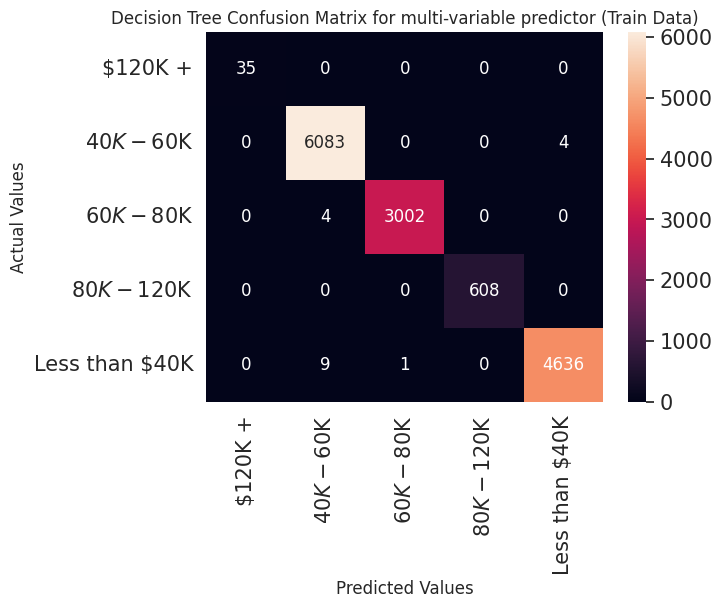

In [ ]:
y_pred_multi_train = dt_multi.predict(x_multi_train)
CM = confusion_matrix(y_train, y_pred_multi_train)

fig = sb.heatmap(CM, annot = True, fmt = "g", xticklabels = dt_multi.classes_, yticklabels = dt_multi.classes_)
fig.set_xlabel("Predicted Values")
fig.set_ylabel("Actual Values")
plt.title("Decision Tree Confusion Matrix for multi-variable predictor (Train Data)")

Text(0.5, 1.0, 'Decision Tree Confusion Matrix for multi-variable predictor (Test Data)')

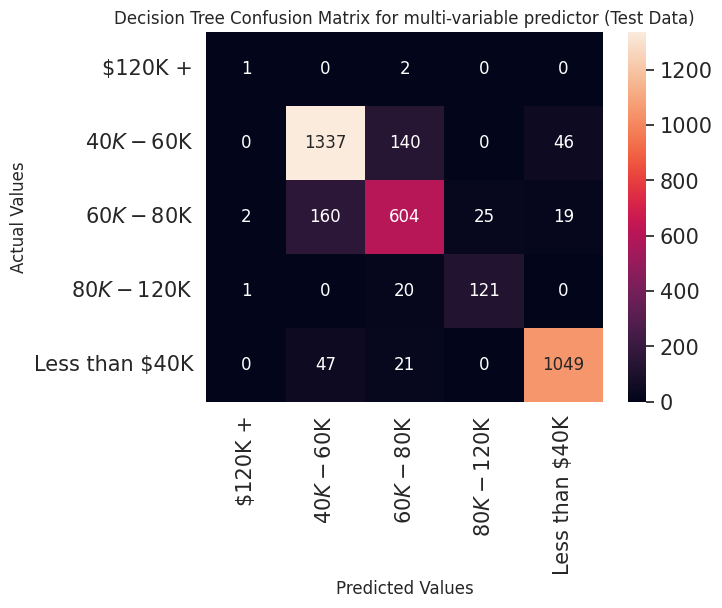

In [ ]:
CM = confusion_matrix(y_test, y_pred_multi)

fig = sb.heatmap(CM, annot = True, fmt = "g", xticklabels = dt_multi.classes_, yticklabels = dt_multi.classes_)
fig.set_xlabel("Predicted Values")
fig.set_ylabel("Actual Values")
plt.title("Decision Tree Confusion Matrix for multi-variable predictor (Test Data)")

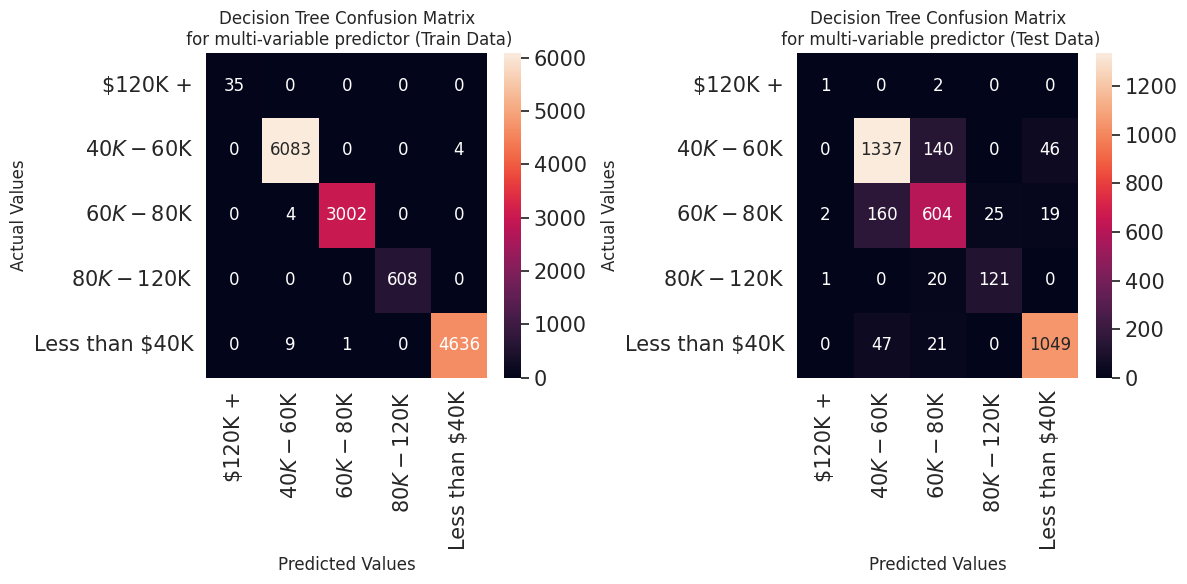

In [ ]:
# Plot the CMs side by side

fig, axes = plt.subplots(1,2, figsize = (12, 6))
CM = confusion_matrix(y_train, y_pred_multi_train)

sb.heatmap(CM, annot = True, fmt = "g", xticklabels = dt_multi.classes_, yticklabels = dt_multi.classes_, ax = axes[0])
axes[0].set_xlabel("Predicted Values")
axes[0].set_ylabel("Actual Values")
axes[0].set_title("Decision Tree Confusion Matrix\n for multi-variable predictor (Train Data)")

CM = confusion_matrix(y_test, y_pred_multi)

sb.heatmap(CM, annot = True, fmt = "g",xticklabels = dt_multi.classes_, yticklabels = dt_multi.classes_, ax = axes[1])
axes[1].set_xlabel("Predicted Values")
axes[1].set_ylabel("Actual Values")
axes[1].set_title("Decision Tree Confusion Matrix\n for multi-variable predictor (Test Data)")

plt.tight_layout()
plt.show()

In [ ]:
print("Train Accuracy for multi-variable predictor:", round(accuracy_score(y_train,y_pred_multi_train),3))
print("Test Accuracy for multi-variable predictor:", acc_multi)

Train Accuracy for multi-variable predictor: 0.999
Test Accuracy for multi-variable predictor: 0.866


In [ ]:
print("\nClassification Report for multi predictor:")
print(classification_report(y_test, y_pred_multi))


Classification Report for multi predictor:
                precision    recall  f1-score   support

       $120K +       0.25      0.33      0.29         3
   $40K - $60K       0.87      0.88      0.87      1523
   $60K - $80K       0.77      0.75      0.76       810
  $80K - $120K       0.83      0.85      0.84       142
Less than $40K       0.94      0.94      0.94      1117

      accuracy                           0.87      3595
     macro avg       0.73      0.75      0.74      3595
  weighted avg       0.87      0.87      0.87      3595



<function matplotlib.pyplot.show(close=None, block=None)>

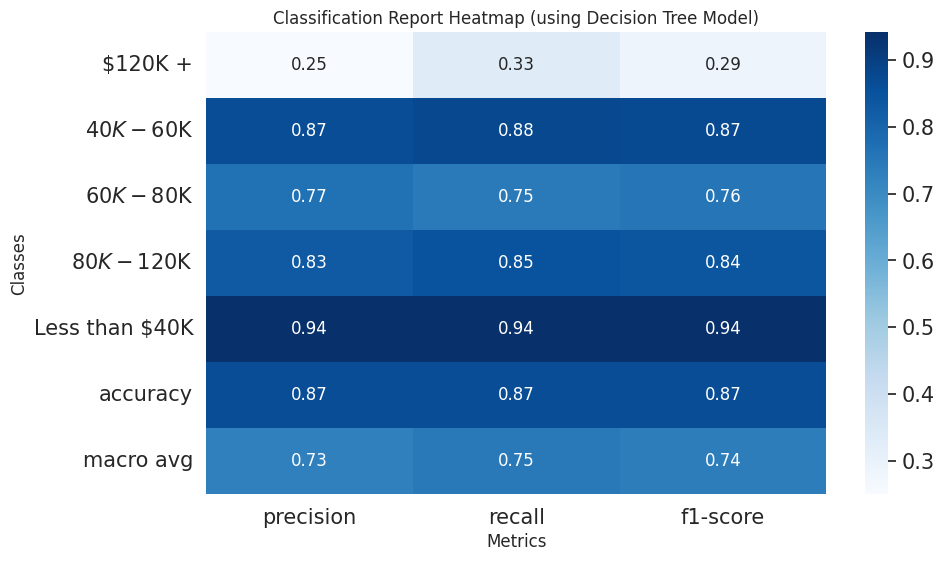

In [ ]:
# Generate classification report
report = classification_report(y_test, y_pred_multi, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Create heatmap
plt.figure(figsize=(10, 6))
sb.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")  # Exclude support and accuracy
plt.title('Classification Report Heatmap (using Decision Tree Model)')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show

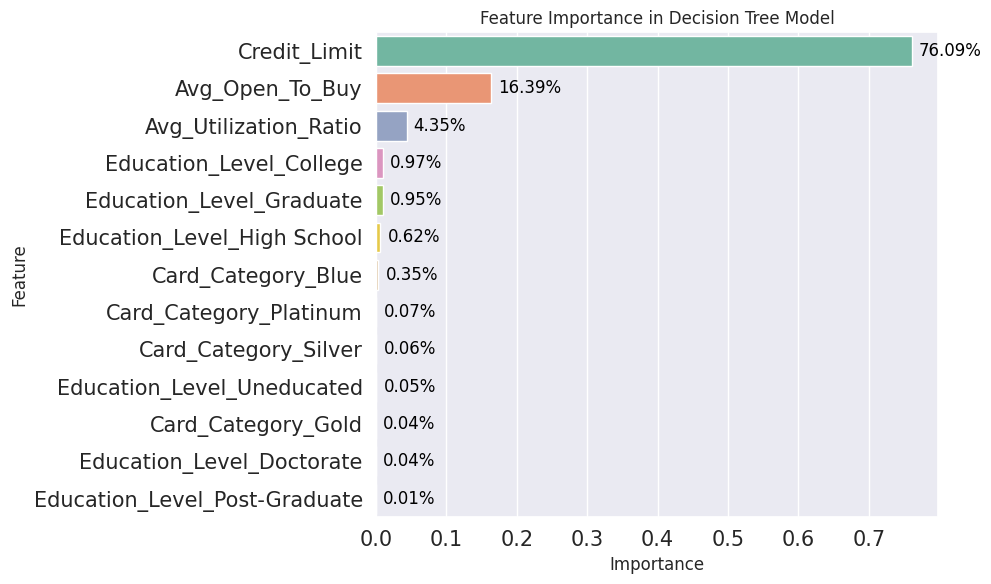

In [ ]:
# Get feature importance from the multi-predictor model (dt_multi)
importances = dt_multi.feature_importances_

# Get feature names
feature_names = x_multi_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Calculate percentage importance for each feature
total_importance = importance_df['Importance'].sum()
importance_df['Percentage'] = (importance_df['Importance'] / total_importance) * 100

# Plot feature importances with percentage labels
plt.figure(figsize=(10, 6))
sb.barplot(x='Importance', y='Feature', data=importance_df, palette = "Set2")
plt.title('Feature Importance in Decision Tree Model')

# Add percentage labels to bars
for i, v in enumerate(importance_df['Importance']):
    plt.text(v + 0.01, i, f'{importance_df["Percentage"].iloc[i]:.2f}%', color='black', va='center')

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Results and Analysis

Decison tree model has the Highest test accuracy across all models (0.866).

Model is useful for predicting income categories below 120k.

credit_limit & Avg_Open_To_Buy are the important variables to predict income_category.

# Conclusion

We can accurately predict the income category (<$120k) of credit card holders based on credit_limit & Avg_Open_To_Buy using the Decision Tree model.

Thank you :)

![Alt text](https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExcWR2ZGxmenNrd2M2ZjY0eG5wMGNlaXp0b25kbWY5N2g0dTBoam1jaCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/sxtBjAxjKrMO7HY5Et/giphy.gif)

